## Analyzing the Impact of External Factors on Retail Store Sales: A Regression Analysis

### Introduction
In the dynamic landscape of retail, understanding the myriad factors that drive store sales has become paramount for businesses aiming to achieve sustained growth and profitability. Sales performance could be influenced not only by internal strategies and product offerings but also by a complex interplay of external factors. These external variables, ranging from economic indicators and climatic conditions to holidays and marketing endeavors, can exert substantial influence on consumer behavior and purchasing patterns. As the retail industry continues to evolve, there is a pressing need to uncover the relationships between these external factors and store sales with a higher degree of precision. This study aims to contribute to this understanding through a rigorous regression analysis, offering insights that can empower retail companies to make informed decisions and optimize their strategies for enhanced sales outcomes.

### Problem Statement
The central problem under investigation in this study is to ascertain the extent to which external factors impact the sales performance of retail stores. While it is widely acknowledged that both internal and external factors contribute to sales fluctuations, there remains a gap in comprehending the specific nature and magnitude of these external influences. Existing research has shown that factors such as economic indicators, weather variations, promotional campaigns, and cultural events can impact consumer spending behavior. However, there is a lack of comprehensive empirical analysis that quantifies the relationships between these external variables and store sales within a unified framework.

### Aim of Project
The aim of this project is to investigate how certain external factors such as oil prices, holiday-events, and natural ocurrances impact the sales of products of Favorita Retail Stores in Ecuador. 

### Hypothesis 
Null Hypothesis (H0):
External factors have no significant impact on retail store sales.

Alternative Hypothesis (H1):
External factors have a significant impact on retail store sales.


### Required Questions

The questions below are to be answered. 
1. Is the train dataset complete (has all the required dates)?

2. Which dates have the lowest and highest sales for each year?

3. Did the earthquake impact sales?

4. Are certain groups of stores selling more products? (Cluster, city, state, type)

5. What is the trend or pattern in sales for specific product categories within certain store types or clusters

6. How does the price of oil impact sales across different product categories?

7. Do promotions have a noticeable effect on sales, and if so, which product categories are most affected?

8. Is there a relationship between the type of holiday and sales patterns?


By addressing these questions, this research endeavors to offer actionable insights that can guide in tailoring their strategies to the prevailing external conditions, ultimately leading to more robust sales performance and competitive advantage and predict store sales for Corporation Favorita, a major grocery retailer in Ecuador .

### Import Necessary libraries

In [1]:
# Load the libraries/modules

# For data manipulation and cleaning
import pandas as pd # a tool for data analysis and manipulation.
import numpy as np # a tool for numerical computations.
from datetime import datetime


# For data visualizations
import matplotlib.pyplot as plt # a tool for ploting graphs/charts.
import seaborn as sns # a tool built on matplotlib for plotting graphs/charts.
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go



# For Statistical testing
import statsmodels.api as sm
from statsmodels.formula.api import ols # for statistical analysis
from statsmodels.tsa.stattools import kpss
from statsmodels.stats.diagnostic import het_arch
from phik import resources, report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# For Feature Engineering & ML modeling
from sklearn.compose import ColumnTransformer # Helps to transform the features
from sklearn.impute import SimpleImputer # For imputing missing values
from sklearn.pipeline import Pipeline # for automation of the preprocessing and feature engineering
from sklearn.preprocessing import OneHotEncoder # For encoding categorical data
from sklearn.preprocessing import StandardScaler # for scaling numerical data
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
import phik
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import DMatrix
from sklearn.model_selection import GridSearchCV



# Hypothesis testing
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error


# Other supporting libraries
import pyodbc #  helps in making access to SQL Server database simple.
from dotenv import dotenv_values # helps to get login credential to the database.
import ssl
import pymssql
import warnings # Hiding not too major the warnings.
warnings.filterwarnings('ignore')



#### Retrieving Login Credential from .env & connecting to a Database

In [2]:
# # Load environment variables from a .env file
# env_variables = dotenv_values('/.env')

# server= env_variables.get('SERVER')
# database= env_variables.get('DATABASE')
# username= env_variables.get('UID')
# password= env_variables.get('PWD')


In [3]:
# connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'


In [4]:
# # Connecting to the Database
# connection = pyodbc.connect(connection_string)

In [5]:
# connection_string = pyodbc.connect(f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}')

In [6]:
# pyodbc.version

In [7]:
#Loading the data from the Database dapDB with CSV files
oil_data = pd.read_csv('database/oil_data.csv')
holi_eve_data = pd.read_csv('database/holidays_events_data.csv')
stores_data = pd.read_csv('database/stores_data.csv')

In [8]:
# Loading the data in pandas to work on.

# # Queries to retrieve tables from the Database dapDB
# query1 ='SELECT * FROM dbo.oil'
# query2 ='SELECT * FROM dbo.holidays_events'
# query3 ='SELECT * FROM dbo.stores'

# #Loading the data from the Database dapDB
# oil_data = pd.read_sql(query1, connection)
# holi_eve_data = pd.read_sql(query2, connection)
# stores_data = pd.read_sql(query3, connection)

#Loading the two data stored in Onedrive
sample_sub_data = pd.read_csv('onedrive/sample_submission.csv')
test_data = pd.read_csv('onedrive/test.csv')

# Loading the two data stored in GitHub
train_data = pd.read_csv('github/train.csv')
transc_data = pd.read_csv('github/transactions.csv')



## Data Preprocessing


### Sample submission data

In [9]:
sample_sub_data

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


In [10]:
sample_sub_data.shape

(28512, 2)

In [11]:
sample_sub_data.isna().sum()

id       0
sales    0
dtype: int64

In [12]:
sample_sub_data.duplicated().sum()

0

### Oil data

In [13]:
oil_data

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997
...,...,...
1213,2017-08-25,47.650002
1214,2017-08-28,46.400002
1215,2017-08-29,46.459999
1216,2017-08-30,45.959999


* Date column has date range from 1st January, 2013 to 31st August,2017

In [14]:
 # Rename the column 'old_column_name' to 'new_column_name'
oil_data.rename(columns={'dcoilwtico': 'oil price'}, inplace=True)

In [15]:
oil_data.shape

(1218, 2)

In [16]:
oil_data.isna().sum()

date          0
oil price    43
dtype: int64

In [17]:
# converting date column to datetime format and an index
oil_data['date'] = pd.to_datetime(oil_data['date'], format='%Y-%m-%d')

oil_data.set_index('date', inplace=True)

In [18]:
oil_data.duplicated().sum()

219

In [19]:
#checking for rows that have been duplicated
oil_data[oil_data.duplicated('oil price', keep=False)].sort_values(by='oil price')

,oil price
date,
2016-01-13,30.420000
2016-01-12,30.420000
2015-12-23,36.759998
2015-12-10,36.759998
2016-03-29,36.910000
...,...
2017-02-20,NaN
2017-04-14,NaN
2017-05-29,NaN


* The dupicates observed in this dataset are not true duplicated values as they show figures of the oil prices which are the same rather than prices which occur on the same day. 

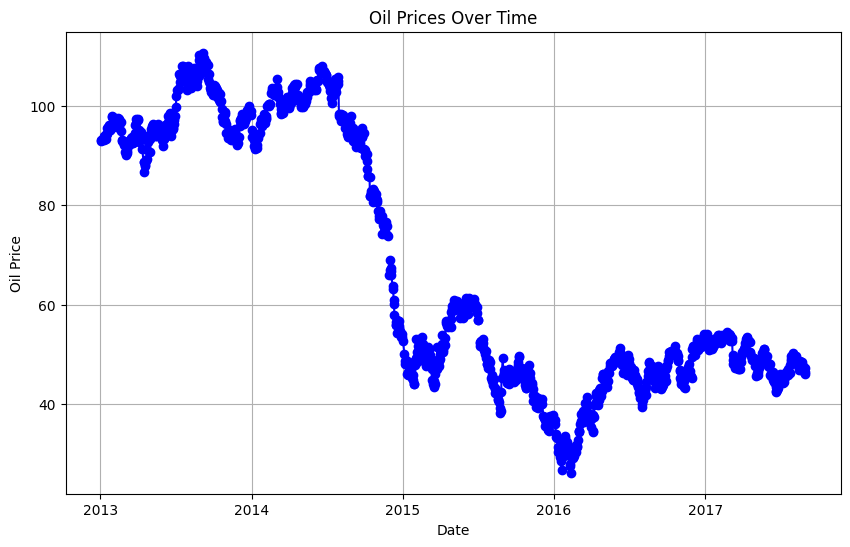

In [20]:
# a line graph of the oil data
plt.figure(figsize=(10, 6))
plt.plot(oil_data.index, oil_data['oil price'], marker='o', linestyle='-', color='b')
plt.title('Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.grid(True)
plt.show()

* From the above graph, we see a flactuation in oil prices from 2013 which realized a sharp decline of the oil prices mid 2014 to 2015. There was a slight increase from 2015 which started decreasing again in the middle of 2015 and subsequently realized a major deep in 2016 and then another rise shortly after that till the middle of 2017. It can also be observed that the points are not connecting which could be due to NAN or missing values. 

#### Handling missing values in the oil_data

In [21]:
# we interpolate using the linear method 
oil_data['oil price'].interpolate(method='linear', inplace=True)

# filling the first data point with fill backward method with the next value 
 
oil_data.loc[oil_data.index[0], 'oil price'] = oil_data['oil price'].iloc[1]

### Store dataset

In [22]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [23]:
stores_data['city'].unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [24]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [25]:
stores_data.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [26]:
stores_data.duplicated().sum()

0

In [27]:
stores_data['type'].unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

In [28]:
# Group the data by 'type' and 'cluster' and calculate the count
cluster_counts = stores_data.groupby(['type', 'cluster']).size().reset_index(name='count')

# Create a bar plot
fig = px.bar(cluster_counts, x='type', y='count', color='cluster', title='Cluster Distribution by Store Type')

# Show the plot
fig.show()


* Store type D has most number of the clusters followed by type C and then A and B. Store type E has 4 of cluster cluster 10 which is the only cluster there. 

In [29]:
# Create a bar plot
fig = px.bar(stores_data, x='store_nbr', y='type', title='Store Type Distribution by Store Number')

# Add labels and title
fig.update_layout(xaxis_title='Store Number', yaxis_title='Store Type')

# Show the plot
fig.show()


* Store type D has more stores(18 stores), followed by Store type C(15), A type (9 stores), B type (8 stores) and E type having just 4 stores

In [30]:
# Create a bar plot
fig = px.bar(stores_data, x='state', y='type', title='Store Type Distribution by State')

# Add labels and title
fig.update_layout(xaxis_title='State', yaxis_title='Store Type')

# Show the plot
fig.show()


* Pinchincha state has most of the different store types and Guayas also havng some number of store types. The other states have just one or two store types except Santa Elena and Loja states which have no store types recorded. 

### Holiday/Events dataset

In [31]:
holi_eve_data.shape

(350, 6)

In [32]:
holi_eve_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [33]:
holi_eve_data

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


* Date in this dataset is from 2nd March,2012 to 26th December,2017

In [34]:
holi_eve_data.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [35]:
holi_eve_data.duplicated().sum()

0

In [36]:
# Change the 'date' to 'datetime' format
holi_eve_data['date'] = pd.to_datetime(holi_eve_data['date'], format='%Y-%m-%d')

# Set the 'date' as index for easy analysis
holi_eve_data.set_index('date', inplace=True)

In [37]:
# # Group the data by date and transferred status, calculate the count of holidays
# holidays_by_date_transfer = holi_eve_data.groupby(['date', 'transferred']).size().reset_index()
# holidays_by_date_transfer.columns = ['Date', 'Transferred', 'Number of Holidays']

# # Add day of the week information
# holidays_by_date_transfer['Day of Week'] = holidays_by_date_transfer['Date'].dt.day_name()

# # Create a line chart with slider using Plotly
# fig = px.line(holidays_by_date_transfer, x='Date', y='Number of Holidays', color='Transferred',
#               title='Trend in Transferred Holidays by Date',
#               labels={'Date': 'Date', 'Number of Holidays': 'Number of Holidays', 'Transferred': 'Transferred Status'})

# # Add a scatter plot for transferred dates with green color
# transferred_dates = holidays_by_date_transfer[holidays_by_date_transfer['Transferred'] == True]
# fig.add_trace(px.scatter(transferred_dates, x='Date', y='Number of Holidays', color_discrete_sequence=['green']).data[0])

# # Add a range slider for interactive exploration
# fig.update_xaxes(rangeslider_visible=True)

# # # Add custom hover data to display the exact day, transferred date, and more details
# # fig.update_traces(hovertemplate='Date: %{x}<br>Day: %{customdata}<br>Number of Holidays: %{y}<br>Transferred: %{color}',
# #                   customdata=holidays_by_date_transfer['Day of Week'])
# fig.update_traces(hovertemplate='Original Date: %{customdata[0]}<br>Transferred Date: %{x}<br>Day: %{customdata[1]}<br>Number of Holidays: %{y}<br>Transferred: %{color}',
#                   customdata=holidays_by_date_transfer[['Date', 'Day of Week']])

# # Show the chart
# fig.show()

In [38]:
# Filter events based on event type or description
event_type = 'Holiday'  # Change this to the desired event type
event_description = 'Earthquake'  # Change this to the desired event description

filtered_events = holi_eve_data[
    (holi_eve_data['type'] == event_type) | (holi_eve_data['description'].str.contains(event_description, case=False))
]

# Display the filtered events
filtered_events

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...
2017-11-12,Holiday,Local,Ambato,Independencia de Ambato,False
2017-12-06,Holiday,Local,Quito,Fundacion de Quito,True
2017-12-08,Holiday,Local,Loja,Fundacion de Loja,False


In [39]:
# Group by 'locale' column and calculate the frequency of each event type
event_frequency_by_locale = holi_eve_data.groupby('locale')['type'].value_counts().unstack().fillna(0)

# Create a bar plot to visualize event frequency by locale
fig = px.bar(event_frequency_by_locale, barmode='stack', title='Event Frequency by Location',
             labels={'locale': 'Location', 'value': 'Frequency'})

# Show the plot
fig.show()

### Transaction Dataset

In [40]:
transc_data.shape

(19162, 3)

In [41]:
transc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19162 entries, 0 to 19161
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          19162 non-null  object 
 1   store_nbr     19161 non-null  float64
 2   transactions  19161 non-null  float64
dtypes: float64(2), object(1)
memory usage: 449.2+ KB


In [42]:
transc_data

,date,store_nbr,transactions
0,2013-01-01,25.0,770.0
1,2013-01-02,1.0,2111.0
2,2013-01-02,2.0,2358.0
3,2013-01-02,3.0,3487.0
4,2013-01-02,4.0,1922.0
...,...,...,...
19157,2014-02-18,45.0,3057.0
19158,2014-02-18,46.0,2902.0
19159,2014-02-18,47.0,3224.0
19160,2014-02-18,48.0,2522.0


In [43]:
transc_data.isna().sum()

date            0
store_nbr       1
transactions    1
dtype: int64

In [44]:
transc_data.duplicated().sum()

0

In [45]:
# check for row 
row_413 = transc_data.iloc[413]
print(row_413)


date            2013-01-10
store_nbr             51.0
transactions        1515.0
Name: 413, dtype: object


In [46]:
# Change the 'date' to 'datetime' format

transc_data['date'] = pd.to_datetime(transc_data['date'], format='%Y-%m-%d', errors='coerce')

# Reset the index of 'transc_data' so that 'date' becomes a column
transc_data.reset_index(inplace=False)

,index,date,store_nbr,transactions
0,0,2013-01-01,25.0,770.0
1,1,2013-01-02,1.0,2111.0
2,2,2013-01-02,2.0,2358.0
3,3,2013-01-02,3.0,3487.0
4,4,2013-01-02,4.0,1922.0
...,...,...,...,...
19157,19157,2014-02-18,45.0,3057.0
19158,19158,2014-02-18,46.0,2902.0
19159,19159,2014-02-18,47.0,3224.0
19160,19160,2014-02-18,48.0,2522.0


### Train dataset

In [47]:
# view the dimension of the data
train_data.shape

(3000888, 6)

In [48]:
# view the data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [49]:
# check the first 5 rows of the data
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [50]:
# check the nan values in each column
train_data.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [51]:
# checking for duplicates in the data 
train_data.duplicated().sum()

0

In [52]:
# converting date to datetime for easy manipulation

train_data['date'] = pd.to_datetime(train_data['date'], format='%Y-%m-%d')
# Reset the index of 'train_data' so that 'date' becomes a column
train_data.reset_index(inplace=True)

#### 1. Check if the train data is complete that's if it has all the required dates

In [53]:
# Identify the expected date range
start_date = train_data['date'].min()
end_date = train_data['date'].max()
expected_date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Get the unique dates present in the train dataset
unique_dates_in_dataset = train_data['date'].dt.date.unique()

# Compare the unique dates with the expected date range
missing_dates = expected_date_range[~expected_date_range.isin(unique_dates_in_dataset)]

if missing_dates.empty:
    print("The train dataset is complete and has all the required dates.")
else:
    print("The train dataset is missing the following dates:")
    print(missing_dates)


The train dataset is missing the following dates:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


#### Input the missing dates into the train_data 

store number is constant in the dataset the missing dates are inputed over the store numbers

In [54]:
# Create a DataFrame with the specified dates
dates_data = {
    'date': pd.to_datetime(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'])
}

dates_df = pd.DataFrame(dates_data)

# Create a list of store_nbr values from 1 to 54 for each date
store_nbr_values = list(range(1, 55))

# Repeat the dates for each store_nbr using list comprehensions
missing_dates_with_stores = {
    'date': [date for date in dates_df['date'] for _ in store_nbr_values],
    'store_nbr': [store_nbr for _ in dates_df['date'] for store_nbr in store_nbr_values]
}

missing_dates_with_stores = pd.DataFrame(missing_dates_with_stores)

# Display the resulting DataFrame
missing_dates_with_stores.head(55)

,date,store_nbr
0,2013-12-25,1
1,2013-12-25,2
2,2013-12-25,3
3,2013-12-25,4
4,2013-12-25,5
5,2013-12-25,6
6,2013-12-25,7
7,2013-12-25,8
8,2013-12-25,9
9,2013-12-25,10


#### Merge the Missing Data with the train_data

In [55]:
# Concatenate the DataFrames and sort by 'date' and 'store_nbr'
train_data = pd.concat([train_data, missing_dates_with_stores], ignore_index=False)

### Now we merge the train datasets with the other datasets that have impact on sale prices by column similarity

### Train dataset merging 


In [56]:
# Merge oil_data and holi_eve_data based on 'date'
train_mod = pd.merge(train_data, oil_data, on='date', how='left')
train_mod = pd.merge(train_mod , holi_eve_data, on='date', how='left')

# Merge stores_data based on 'store_nbr'
train_mod = pd.merge(train_mod , stores_data, on='store_nbr', how='left')

# Merge 'transc_data' based on 'date' and 'store_nbr'
train_mod = pd.merge(train_mod , transc_data, on=['date', 'store_nbr'], how='left')

In [57]:
# view the first 5 rows of the data
train_mod.head()

,index,id,date,store_nbr,family,sales,onpromotion,oil price,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster,transactions
0,0.0,0.0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
1,1.0,1.0,2013-01-01,1,BABY CARE,0.0,0.0,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
2,2.0,2.0,2013-01-01,1,BEAUTY,0.0,0.0,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
3,3.0,3.0,2013-01-01,1,BEVERAGES,0.0,0.0,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
4,4.0,4.0,2013-01-01,1,BOOKS,0.0,0.0,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN


there are two types in the dataset. One for holidays and another for store metadata so we rename them as such 

In [58]:
#Rename column name type x and type y 
train_mod= train_mod.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})

In [59]:
# Rename the 'family' column
train_mod.rename(columns={'family': 'Product'}, inplace=True)

In [60]:
#view the data information
train_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054564 entries, 0 to 3054563
Data columns (total 18 columns):
 #   Column        Dtype         
---  ------        -----         
 0   index         float64       
 1   id            float64       
 2   date          datetime64[ns]
 3   store_nbr     int64         
 4   Product       object        
 5   sales         float64       
 6   onpromotion   float64       
 7   oil price     float64       
 8   holiday_type  object        
 9   locale        object        
 10  locale_name   object        
 11  description   object        
 12  transferred   object        
 13  city          object        
 14  state         object        
 15  store_type    object        
 16  cluster       int64         
 17  transactions  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(9)
memory usage: 419.5+ MB


In [61]:
# check for nan values 
train_mod.isna().sum()

index               216
id                  216
date                  0
store_nbr             0
Product             216
sales               216
onpromotion         216
oil price        878580
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
city                  0
state                 0
store_type            0
cluster               0
transactions    2414496
dtype: int64

In [62]:
# check for number of duplicates
train_mod.duplicated().sum()

0

In [63]:
# Get the unique years contained in the dataset
train_mod['date'].dt.year.unique()

array([2013, 2014, 2015, 2016, 2017])

In [64]:
# Decompose the date column into Year, Year-Month, Month and Day to facilitate deep analysis
# year
train_mod['year'] = train_mod.date.dt.year

# year-month
train_mod['year-month'] = train_mod['date'].apply(lambda x : x.strftime('%Y-%m'))

# month
train_mod['month'] = train_mod.date.dt.month

# day
train_mod['day'] = train_mod.date.dt.day

In [65]:
# Check distinct month
sorted(train_mod['month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [66]:
# Interpolate missing values along the "oil price" for train_data
train_mod['oil price'].interpolate(method='linear', inplace=True)

In [67]:
# check for nan values 
train_mod['oil price'].isna().sum()

0

In [68]:
# Forwardfill onpromotion
train_mod['onpromotion'] = train_mod['onpromotion'].fillna(method='ffill')
# Forwardfill onpromotion
train_mod['cluster'] = train_mod['cluster'].fillna(method='ffill')
# Forwardfill onpromotion
train_mod['Product'] = train_mod['Product'].fillna(method='ffill')


In [69]:
# Convert onpromotion to int
train_mod['onpromotion'] = train_mod['onpromotion'].astype('int')

In [70]:
# Sort the DataFrame by 'store_nbr' and 'date' to ensure proper filling
train_mod = train_mod.sort_values(by=['store_nbr', 'date'])

# Forward-fill NaN values in the 'city' column based on 'store_nbr'
train_mod['city'] = train_mod.groupby('store_nbr')['city'].fillna(method='ffill')

# Forward-fill NaN values in the 'state' column based on 'store_nbr'
train_mod['state'] = train_mod.groupby('store_nbr')['state'].fillna(method='ffill')

# Forward-fill NaN values in the 'state' column based on 'store_nbr'
train_mod['locale'] = train_mod.groupby('store_nbr')['locale'].fillna(method='ffill')

# Forward-fill NaN values in the 'state' column based on 'store_nbr'
train_mod['locale_name'] = train_mod.groupby('store_nbr')['locale_name'].fillna(method='ffill')

# Forward-fill NaN values in the 'state' column based on 'store_nbr'
train_mod['description'] = train_mod.groupby('store_nbr')['description'].fillna(method='ffill')

# Forward-fill NaN values in the 'state' column based on 'store_nbr'
train_mod['transferred'] = train_mod.groupby('store_nbr')['transferred'].fillna(method='ffill')

# Forward-fill NaN values in the 'state' column based on 'store_nbr'
train_mod['Store Type'] = train_mod.groupby('store_nbr')['store_type'].fillna(method='ffill')

In [71]:
# Forwardfill sales 
train_mod['sales'] = train_mod['sales'].fillna(method='ffill')

In [72]:
# Filter and keep only rows where 'type' is not 'Holiday' or 'transferred' is False
train_mod[~((train_mod['holiday_type'] == 'Holiday') & (train_mod['transferred'] == True))]

# Update 'type' column: Change 'Transfer' to 'Holiday'
train_mod.loc[train_mod['holiday_type'] == 'Transfer', 'holiday_type'] = 'Holiday'

In [73]:
# Replace NaN values in 'Holiday Type' column based on the day of the week
train_mod['holiday_type'].fillna(train_mod['date'].apply(lambda x: 'Work Day' if x.weekday() < 5 else 'Weekend'), inplace=True)

In [74]:
# group product into product category for easy analysis
groups = {
    'Grocery and Household Essentials': ['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BREAD/BAKERY', 'CLEANING', 'DAIRY', 'EGGS', 'GROCERY I', 'GROCERY II', 'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES', 'HOME CARE', 'PERSONAL CARE', 'PET SUPPLIES', 'SCHOOL AND OFFICE SUPPLIES'],
    'Apparel and Fashion': ['LADIESWEAR', 'LINGERIE'],
    'Entertainment and Leisure': ['BOOKS', 'CELEBRATION', 'MAGAZINES', 'PLAYERS AND ELECTRONICS'],
    'Hardware and Home Improvement': ['HARDWARE', 'LAWN AND GARDEN'],
    'Food and Beverages': ['DELI', 'FROZEN FOODS', 'LIQUOR,WINE,BEER', 'MEATS', 'PREPARED FOODS', 'PRODUCE', 'SEAFOOD']
}

# Create a new column 'Product_Category_Group' based on the mapping
train_mod['Product_Category'] = train_mod['Product'].apply(lambda x: next((group for group, categories in groups.items() if x in categories), 'Other'))

train_mod.head()

,index,id,date,store_nbr,Product,sales,onpromotion,oil price,holiday_type,locale,...,state,store_type,cluster,transactions,year,year-month,month,day,Store Type,Product_Category
0,0.0,0.0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.139999,Holiday,National,...,Pichincha,D,13,NaN,2013,2013-01,1,1,D,Grocery and Household Essentials
1,1.0,1.0,2013-01-01,1,BABY CARE,0.0,0,93.139999,Holiday,National,...,Pichincha,D,13,NaN,2013,2013-01,1,1,D,Grocery and Household Essentials
2,2.0,2.0,2013-01-01,1,BEAUTY,0.0,0,93.139999,Holiday,National,...,Pichincha,D,13,NaN,2013,2013-01,1,1,D,Grocery and Household Essentials
3,3.0,3.0,2013-01-01,1,BEVERAGES,0.0,0,93.139999,Holiday,National,...,Pichincha,D,13,NaN,2013,2013-01,1,1,D,Grocery and Household Essentials
4,4.0,4.0,2013-01-01,1,BOOKS,0.0,0,93.139999,Holiday,National,...,Pichincha,D,13,NaN,2013,2013-01,1,1,D,Entertainment and Leisure


In [75]:
# for for nan values 
train_mod.isna().sum()

index                   216
id                      216
date                      0
store_nbr                 0
Product                   0
sales                     0
onpromotion               0
oil price                 0
holiday_type              0
locale                    0
locale_name               0
description               0
transferred               0
city                      0
state                     0
store_type                0
cluster                   0
transactions        2414496
year                      0
year-month                0
month                     0
day                       0
Store Type                0
Product_Category          0
dtype: int64

#### Drop columns

Drop the columns that are not necessary in the analysis

In [76]:
train_mod.drop(columns=['transactions', 'index', 'id'],inplace=True)

In [77]:
# check for nan values
train_mod.isna().sum()

date                0
store_nbr           0
Product             0
sales               0
onpromotion         0
oil price           0
holiday_type        0
locale              0
locale_name         0
description         0
transferred         0
city                0
state               0
store_type          0
cluster             0
year                0
year-month          0
month               0
day                 0
Store Type          0
Product_Category    0
dtype: int64

* NAN values completely handled in the train dataset

#### 2. Which dates have the lowest and highest sales for each year?

In [78]:
 # Group by year and find the row with the lowest sales for each year
lowest_sales_dates = train_mod.loc[train_mod.groupby(train_mod['date'].dt.year)['sales'].idxmin()]

# Group by year and find the row with the highest sales for each year
highest_sales_dates = train_mod.loc[train_mod.groupby(train_mod['date'].dt.year)['sales'].idxmax()]

# Display the results
print("Dates with lowest sales for each year:")
print(lowest_sales_dates[['date', 'sales']])

print("\nDates with highest sales for each year:")
print(highest_sales_dates[['date', 'sales']])

Dates with lowest sales for each year:
              date  sales
0       2013-01-01    0.0
657558  2014-01-01    0.0
1316898 2015-01-01    0.0
1972674 2016-01-01    0.0
2642706 2017-01-01    0.0

Dates with highest sales for each year:
              date       sales
569724  2013-11-12   46271.000
1273284 2014-12-08   45361.000
1941534 2015-12-14   40351.460
2194017 2016-05-02  124717.000
2806629 2017-04-02   38422.625


From the analysis above, the lowest sales of 0.0 were recorded on January 1st.
across all the years that is 2013, 2014, 2015, 2016, and 2017. 


* In the year 2013, the highest sales of 46,271.000 occurred on November 12th.

* In 2014, the highest sales of 45,361.000 were achieved on December 8th.
* The year 2015 saw the highest sales of 40,351.460 on December 14th.
* The peak sales of 124,717.000 were attained on May 2nd in 2016.
* Lastly, the highest sales of 38,422.625 were recorded on April 2nd in 2017.

In [79]:
# Set the 'date' as index for easy analysis
train_mod.set_index('date', inplace=True)

In [80]:
# correlation of sales and oil price
train_mod['sales'].corr(train_mod['oil price'])

-0.07559337278157659

* There is a minimal and almost negligible negative relationship between oil prices and sales. In practical terms, this correlation suggests that changes in oil prices have little to no impact on sales. Other factors or variables likely have a much more substantial influence on sales than oil prices in your specific context.

A correlation coefficient of -0.0756 indicates an extremely weak and almost negligible negative relationship between sales and oil prices. It suggests that oil prices are not a significant driver of changes in sales in your dataset.

In [81]:
# create coy of merged trained data
train_mod_c = train_mod.copy()

In [82]:
# view for data information
train_mod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054564 entries, 2013-01-01 to 2017-08-15
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_nbr         int64  
 1   Product           object 
 2   sales             float64
 3   onpromotion       int32  
 4   oil price         float64
 5   holiday_type      object 
 6   locale            object 
 7   locale_name       object 
 8   description       object 
 9   transferred       bool   
 10  city              object 
 11  state             object 
 12  store_type        object 
 13  cluster           int64  
 14  year              int32  
 15  year-month        object 
 16  month             int32  
 17  day               int32  
 18  Store Type        object 
 19  Product_Category  object 
dtypes: bool(1), float64(2), int32(4), int64(2), object(11)
memory usage: 422.4+ MB


## Answering the rest of Questions and Hypothesis

##### train_mod_c for answering questions  

### 3. Did the earthquake impact sales?


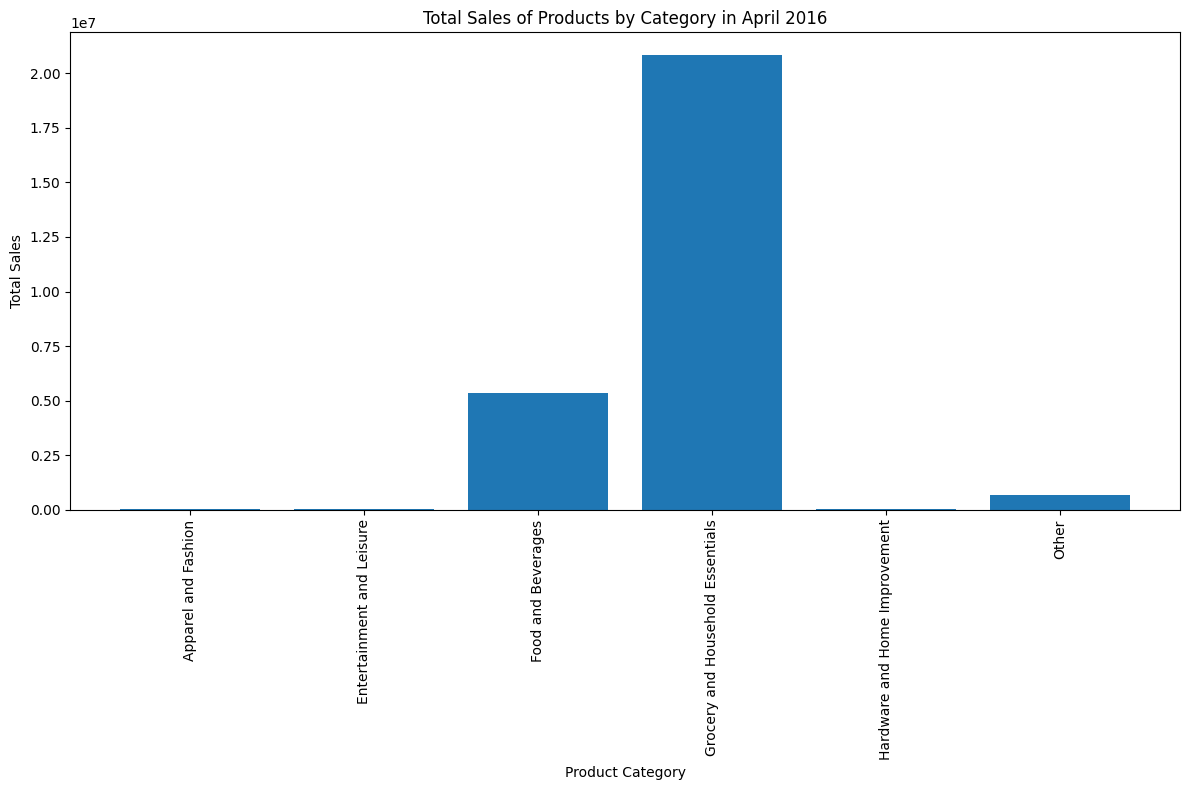

In [83]:
# Define the date range for the month of the earthquake (April 16, 2016, to April 22, 2016)
# Convert start_date and end_date to datetime objects
start_date = pd.to_datetime('2016-04-01')
end_date = pd.to_datetime('2016-04-30')
# Filter your train_data DataFrame to include only the data for the month of the earthquake
april_2016_data = train_mod_c[(train_mod_c.index >= start_date) & (train_mod_c.index <= end_date)]

# Group the data by 'Product_Category' and calculate the total sales for each category during April 2016
april_2016_stats = april_2016_data.groupby(['Product_Category'])['sales'].sum().reset_index()

# Create a bar plot to visualize the total sales for each product category in April 2016
plt.figure(figsize=(12, 8))
plt.bar(april_2016_stats['Product_Category'], april_2016_stats['sales'])
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales of Products by Category in April 2016')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


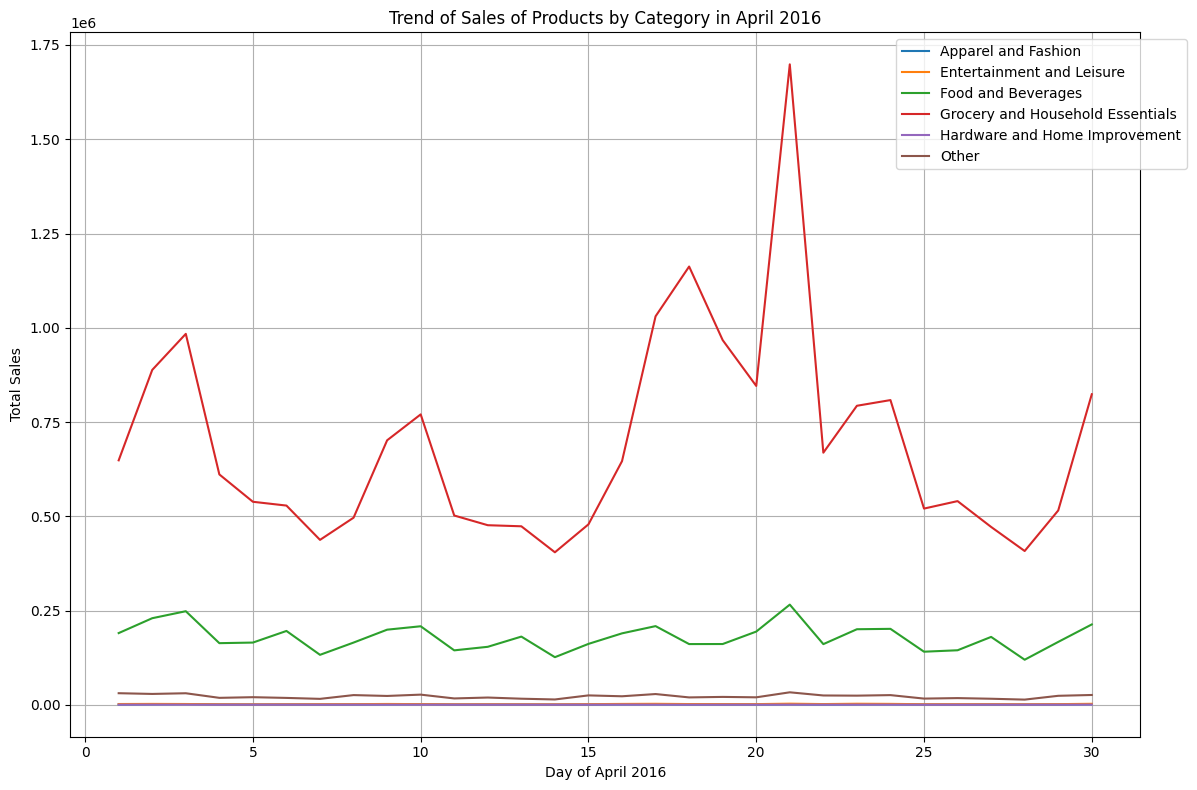

In [84]:
# Convert the 'Year', 'Month', 'Day' columns to integers if they are not already.
train_mod_c['year'] = train_mod_c['year'].astype(int)
train_mod_c['month'] = train_mod_c['month'].astype(int)
train_mod_c['day'] = train_mod_c['day'].astype(int)

# Define the date range for the entire month of April 2016
start_date = '2016-04-01'
end_date = '2016-04-30'

# Filter your train_data DataFrame to include only the data for April 2016
april_2016_data = train_mod_c[
    (train_mod_c['year'] == 2016) & (train_mod_c['month'] == 4)
]

# Group the data by 'Product_Category', 'Year', 'Month', 'Day', and calculate the daily total sales for each category during April 2016
april_2016_stats = april_2016_data.groupby(['Product_Category', 'year', 'month', 'day'])['sales'].sum().reset_index()

# Create a line plot to visualize the trend of sales for each product category in April 2016
plt.figure(figsize=(12, 8))
categories = april_2016_stats['Product_Category'].unique()

for category in categories:
    category_data = april_2016_stats[april_2016_stats['Product_Category'] == category]
    plt.plot(category_data['day'], category_data['sales'], label=category)

plt.xlabel('Day of April 2016')
plt.ylabel('Total Sales')
plt.title('Trend of Sales of Products by Category in April 2016')
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


* ##### same graph in plotly

In [85]:
# Convert the 'Year', 'Month', 'Day' columns to integers if they are not already.
train_mod_c['year'] = train_mod_c['year'].astype(int)
train_mod_c['month'] = train_mod_c['month'].astype(int)
train_mod_c['day'] = train_mod_c['day'].astype(int)

# Define the date range for the entire month of April 2016
start_date = '2016-04-01'
end_date = '2016-04-30'

# Filter your train_data DataFrame to include only the data for April 2016
april_2016_data = train_mod_c[
    (train_mod_c['year'] == 2016) & (train_mod_c['month'] == 4)
]

# Group the data by 'Product_Category', 'Year', 'Month', 'Day', and calculate the daily total sales for each category during April 2016
april_2016_stats = april_2016_data.groupby(['Product_Category', 'year', 'month', 'day'])['sales'].sum().reset_index()
# Create a line plot using Plotly to visualize the trend of sales for each product category in April 2016
fig = px.line(april_2016_stats, x='day', y='sales', color='Product_Category', title='Trend of Sales of Products by Category in April 2016')
fig.update_xaxes(title='Day of April 2016')
fig.update_yaxes(title='Total Sales')
fig.show()


* Based on the analysis of the graphs, it is evident that the impact of the earthquake on total sales can be observed by analyzing the trends in product categories. Throughout the month, Grocery and Household Essentials were consistently popular, followed by Food and Beverages, while other categories had lower sales. A week before the earthquake (16th April 2016), both top categories experienced fluctuations in sales, slightly peaking on the day of the earthquake. Two days after, Grocery and Household Essentials sales surged, but Food and Beverages declined. Another two days later, sales dropped again but peaked significantly on 21st April 2016, possibly due to aftershock fears. By the next day, sales drastically decreased, and trends returned to normal

### 4. Are certain groups of stores selling more products? (Cluster, city, state, type)

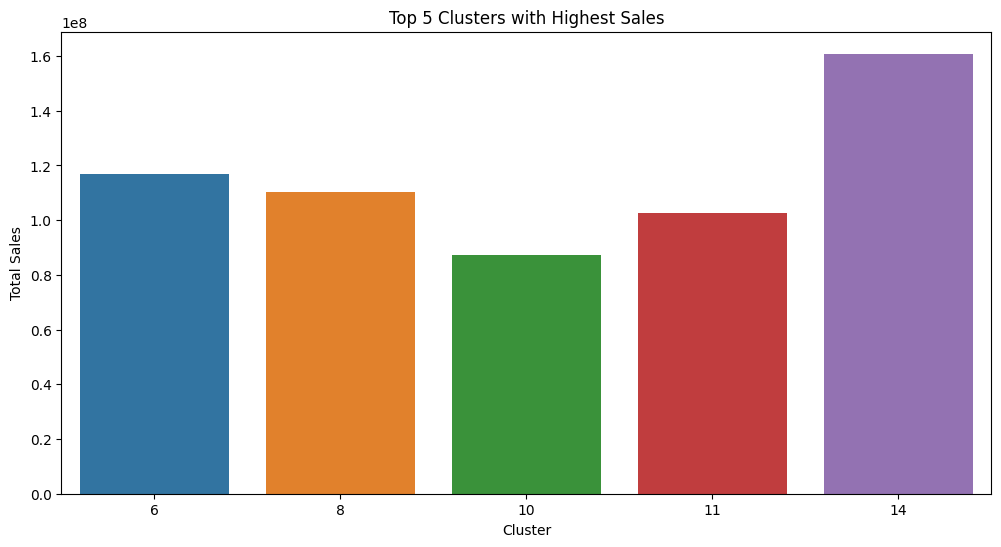

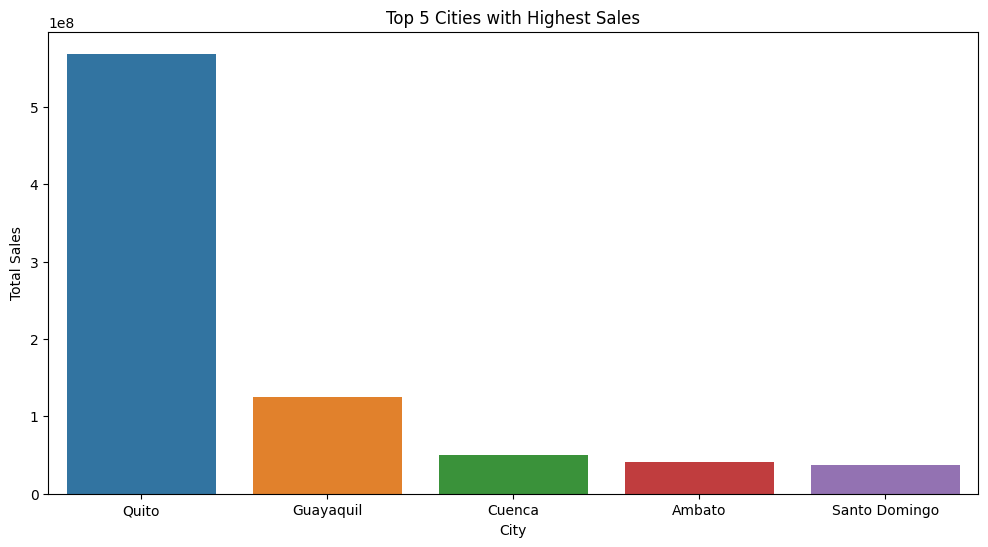

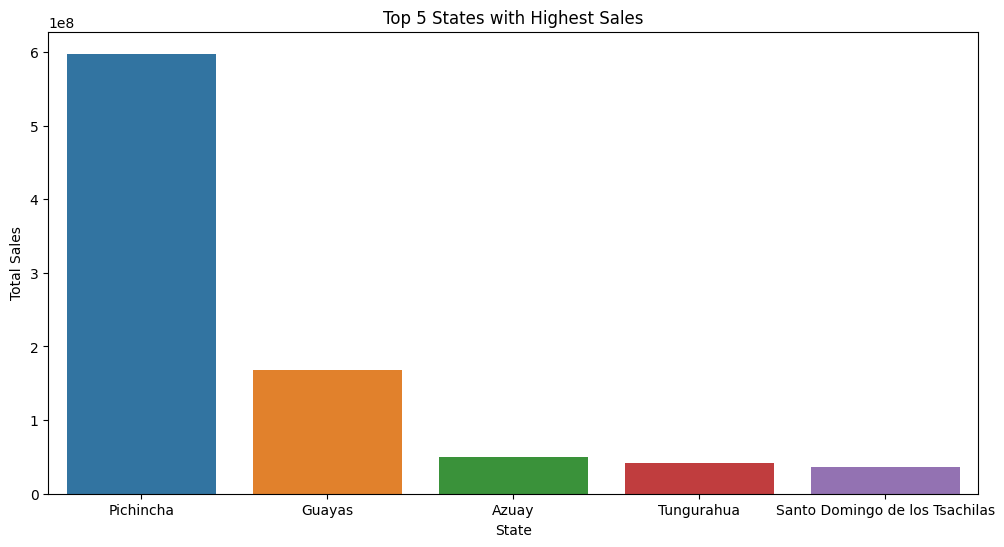

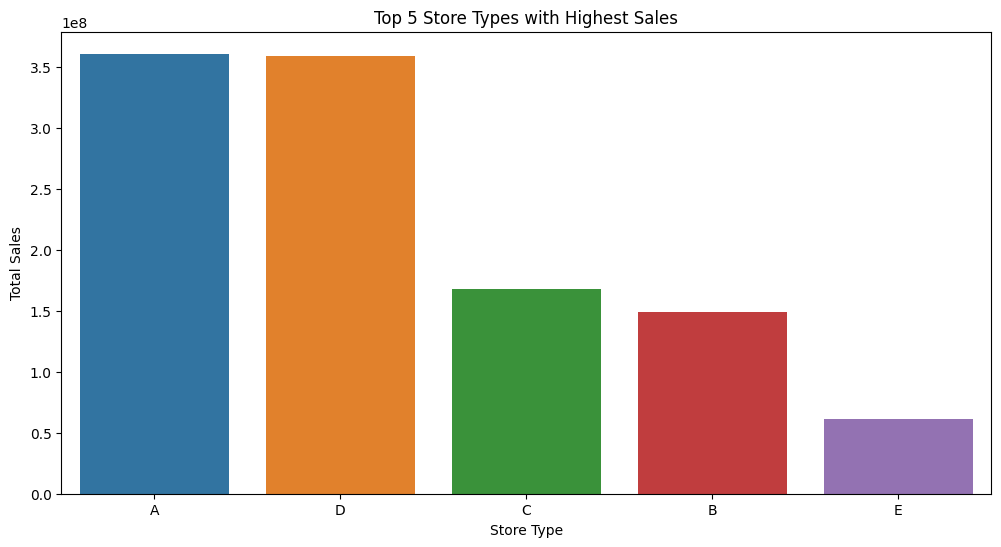

In [86]:
# Data Preparation
relevant_columns = ['sales', 'cluster', 'city', 'state', 'store_type']
data_subset = train_mod_c[relevant_columns]

# Aggregate Sales by Group
grouped_data = data_subset.groupby(['cluster', 'city', 'state', 'store_type'])['sales'].sum().reset_index()
# Sort the grouped data by sales in descending order
sorted_data = grouped_data.sort_values(by='sales', ascending=False)

# Sort the grouped data by sales in descending order and select the top 5 for each category
top_clusters = grouped_data.groupby('cluster')['sales'].sum().nlargest(5).reset_index()
top_cities = grouped_data.groupby('city')['sales'].sum().nlargest(5).reset_index()
top_states = grouped_data.groupby('state')['sales'].sum().nlargest(5).reset_index()
top_store_types = grouped_data.groupby('store_type')['sales'].sum().nlargest(5).reset_index()

# Plotting the top 5 clusters
plt.figure(figsize=(12, 6))
sns.barplot(x='cluster', y='sales', data=top_clusters, ci=None, estimator=sum)
plt.xlabel('Cluster')
plt.ylabel('Total Sales')
plt.title('Top 5 Clusters with Highest Sales')
plt.show()

# Plotting the top 5 cities
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='sales', data=top_cities, ci=None, estimator=sum)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Top 5 Cities with Highest Sales')
plt.show()

# Plotting the top 5 states
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='sales', data=top_states, ci=None, estimator=sum)
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Top 5 States with Highest Sales')
plt.show()

# Plotting the top 5 store types
plt.figure(figsize=(12, 6))
sns.barplot(x='store_type', y='sales', data=top_store_types, ci=None, estimator=sum)
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.title('Top 5 Store Types with Highest Sales')
plt.show()


In [87]:
# Group by cluster, city, state, and store type and calculate total sales for each
cluster_sales = train_mod_c.groupby('cluster')['sales'].sum()
city_sales = train_mod_c.groupby('city')['sales'].sum()
state_sales = train_mod_c.groupby('state')['sales'].sum()
store_type_sales = train_mod_c.groupby('store_type')['sales'].sum()

# Find the cluster, city, state, and store type with the highest total sales
best_cluster = cluster_sales.idxmax()
best_city = city_sales.idxmax()
best_state = state_sales.idxmax()
best_store_type = store_type_sales.idxmax()

print("Cluster with the highest total sales:", best_cluster)
print("City with the highest total sales:", best_city)
print("State with the highest total sales:", best_state)
print("Store type with the highest total sales:", best_store_type)



Cluster with the highest total sales: 14
City with the highest total sales: Quito
State with the highest total sales: Pichincha
Store type with the highest total sales: A


In [88]:
# Statistical Analysis 

# Perform ANOVA for 'cluster'
anova_result = f_oneway(*[grouped_data[grouped_data['cluster'] == cluster]['sales'] for cluster in grouped_data['cluster'].unique()])
print("Cluster ANOVA Results:")
print(anova_result)
print("\n")  # Line break

# Perform ANOVA for 'city'
anova_result = f_oneway(*[grouped_data[grouped_data['city'] == cluster]['sales'] for cluster in grouped_data['city'].unique()])
print("City ANOVA Results:")
print(anova_result)
print("\n")  # Line break

# Perform ANOVA for 'state'
anova_result = f_oneway(*[grouped_data[grouped_data['state'] == cluster]['sales'] for cluster in grouped_data['state'].unique()])
print("State ANOVA Results:")
print(anova_result)
print("\n")  # Line break

# Perform ANOVA for 'store_type'
anova_result = f_oneway(*[grouped_data[grouped_data['store_type'] == cluster]['sales'] for cluster in grouped_data['store_type'].unique()])
print("Store ANOVA Results:")
print(anova_result)
  

Cluster ANOVA Results:
F_onewayResult(statistic=2.4740781430582457, pvalue=0.020563664634725684)


City ANOVA Results:
F_onewayResult(statistic=0.7008035074519786, pvalue=0.7874393770751986)


State ANOVA Results:
F_onewayResult(statistic=1.1365390633245915, pvalue=0.3750836168473563)


Store ANOVA Results:
F_onewayResult(statistic=3.933225402808011, pvalue=0.009277577465694983)


* From the ANOVA test,sales vary significantly across different clusters and store types, while there is no significant difference in sales between cities and states

 ### 5. What is the trend or pattern in sales for specific product categories within certain store types or clusters

In [89]:
# Convert the 'Year', 'Month', 'Day' columns to integers if they are not already.
train_mod_c['year'] = train_mod_c['year'].astype(int)
train_mod_c['month'] = train_mod_c['month'].astype(int)
train_mod_c['day'] = train_mod_c['day'].astype(int)

# Group the data by 'Product_Category' and 'store_type' and calculate the average sales for each combination
category_store_sales = train_mod_c.groupby(['Product_Category', 'store_type'])['sales'].mean().reset_index()

# Create a bar chart using Plotly to visualize the average sales of specific product categories within different store types
fig = px.bar(category_store_sales, x='Product_Category', y='sales', color='store_type',
             title='Average Sales of Product Categories by Store Type')
fig.update_xaxes(title='Product Category')
fig.update_yaxes(title='Average Sales')
fig.show()



### 6. How does the price of oil impact sales across different product categories?


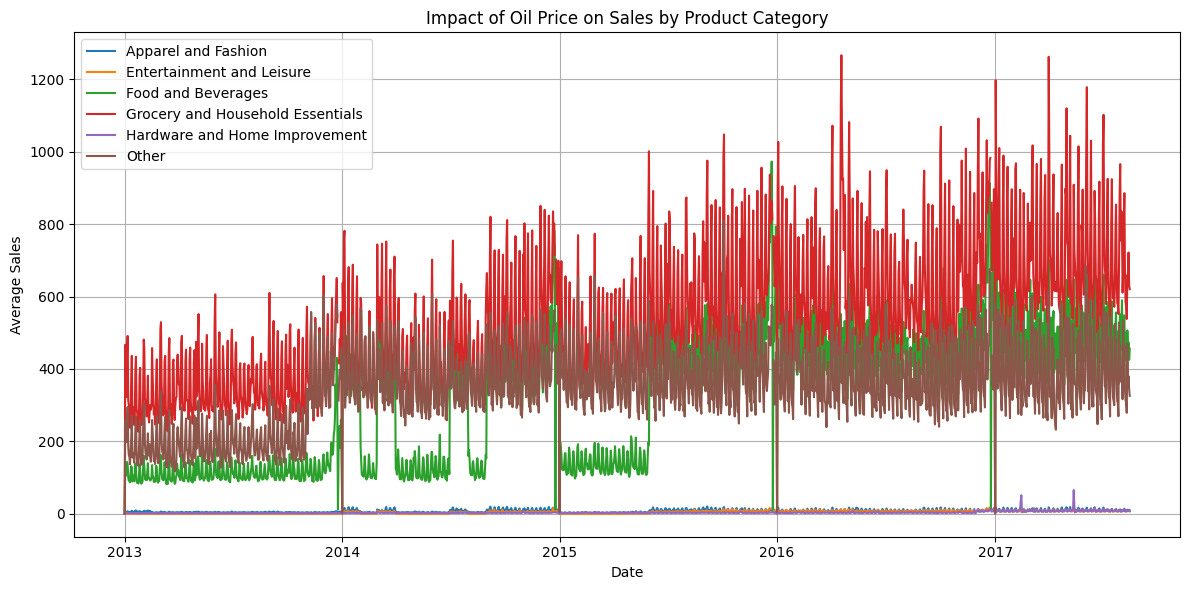

In [90]:
# Group the data by 'date' and 'Product_Category' and calculate the average sales and average oil price for each group
sales_oil_price = train_mod_c.groupby(['date', 'Product_Category'])[['sales', 'oil price']].mean().reset_index()

# Create a pivot table to have 'Product_Category' as columns, 'date' as index, and 'sales' and 'oil price' as values
pivot_sales_oil_price = sales_oil_price.pivot(index='date', columns='Product_Category', values=['sales', 'oil price'])

# Plot the relationship between oil price and sales for different product categories
plt.figure(figsize=(12, 6))
for category in pivot_sales_oil_price['sales'].columns:
    plt.plot(pivot_sales_oil_price.index, pivot_sales_oil_price['sales'][category], label=category)

plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.title('Impact of Oil Price on Sales by Product Category')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [91]:
# Group the data by 'date' and 'Product_Category' and calculate the average sales and average oil price for each group
sales_oil_price = train_mod_c.groupby(['date', 'Product_Category'])[['sales', 'oil price']].mean().reset_index()

# Create a Plotly line chart to visualize the relationship between oil price and sales for different product categories
fig = px.line(sales_oil_price, x='date', y='sales', color='Product_Category',
              title='Impact of Oil Price on Sales by Product Category',
              labels={'date': 'Date', 'sales': 'Average Sales'})

fig.update_yaxes(title_text='Average Sales')
fig.update_xaxes(title_text='Date')
fig.update_layout(legend_title_text='Product Category')

# Add oil price as a secondary y-axis
fig.add_trace(px.line(sales_oil_price, x='date', y='oil price', color_discrete_sequence=['black']).data[0])

fig.update_yaxes(title_text='Oil Price', secondary_y=True)

fig.show()


In [92]:
# Group the data by 'Product_Category' and calculate the correlation between 'sales' and 'oil price' for each category
correlations = sales_oil_price.groupby('Product_Category')[['sales', 'oil price']].corr().iloc[0::2]['oil price'].reset_index()

# Print or display the correlations
correlations


,Product_Category,level_1,oil price
0,Apparel and Fashion,sales,-0.370378
1,Entertainment and Leisure,sales,-0.673043
2,Food and Beverages,sales,-0.648504
3,Grocery and Household Essentials,sales,-0.585645
4,Hardware and Home Improvement,sales,-0.334172
5,Other,sales,-0.407483


In [93]:
# Calculate correlation coefficients and p-values for each category
correlations['P-Value'] = correlations.apply(lambda row: pearsonr(sales_oil_price[sales_oil_price['Product_Category'] == row['Product_Category']]['sales'],
                                                                  sales_oil_price[sales_oil_price['Product_Category'] == row['Product_Category']]['oil price'])[1], axis=1)

# Print or display the correlations DataFrame with p-values
correlations


,Product_Category,level_1,oil price,P-Value
0,Apparel and Fashion,sales,-0.370378,6.726577e-56
1,Entertainment and Leisure,sales,-0.673043,1.307401e-222
2,Food and Beverages,sales,-0.648504,4.941303e-202
3,Grocery and Household Essentials,sales,-0.585645,1.271585e-155
4,Hardware and Home Improvement,sales,-0.334172,3.263658e-45
5,Other,sales,-0.407483,2.289894e-68


* The correlations are negative, indicating that when oil prices rise, sales in these categories tend to decrease significantly. These correlations are statistically highly significant, suggesting a meaningful relationship between oil prices and sales for these product categories.

In [94]:
# Group the data by 'Product_Category' and calculate the Pearson correlation coefficient and p-value for each category
correlation_results = {}
for category in train_mod_c['Product_Category'].unique():
    category_data = train_mod_c[train_mod_c['Product_Category'] == category]
    correlation, p_value = pearsonr(category_data['oil price'], category_data['sales'])
    correlation_results[category] = {'Correlation': correlation, 'P-Value': p_value}

# Create a DataFrame from the correlation results
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index')

# Filter significant correlations (you can adjust the significance level)
significant_correlations = correlation_df[correlation_df['P-Value'] < 0.05]

# Display the significant correlations
print("Significant Correlations:")
print(significant_correlations)


Significant Correlations:
                                  Correlation        P-Value
Grocery and Household Essentials    -0.078878   0.000000e+00
Entertainment and Leisure           -0.250939   0.000000e+00
Food and Beverages                  -0.126586   0.000000e+00
Hardware and Home Improvement       -0.118954   0.000000e+00
Apparel and Fashion                 -0.117961   0.000000e+00
Other                               -0.115735  2.148318e-273



### 7. Do promotions have a noticeable effect on sales, and if so, which product categories are most affected?


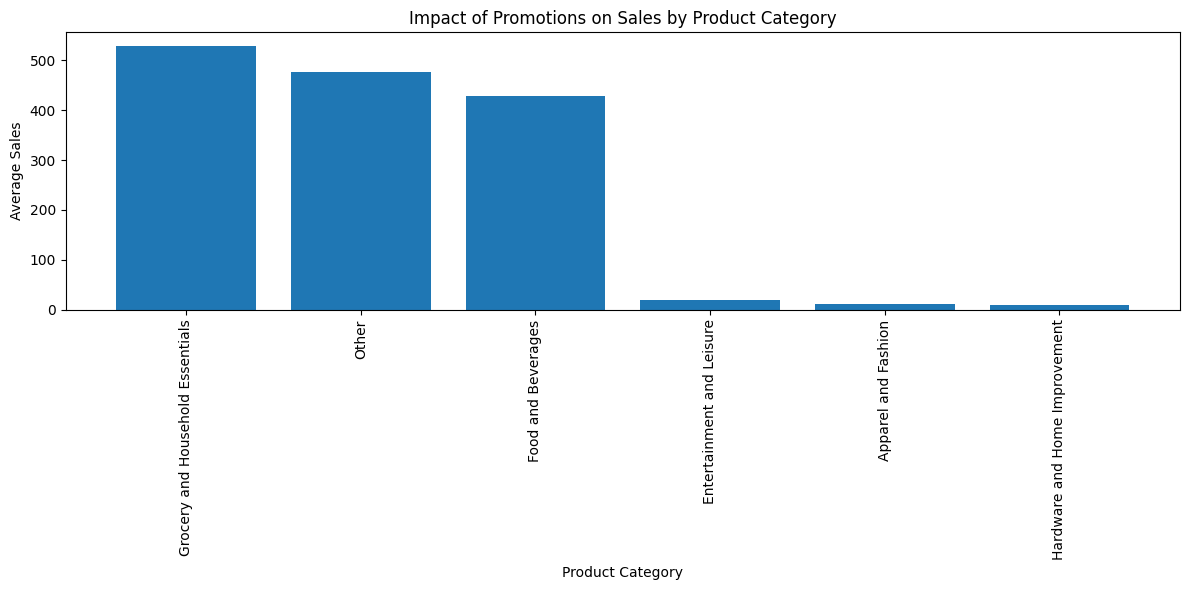

In [95]:
# Group the data by 'onpromotion' (True or False) and 'Product_Category' and calculate the average sales for each group
promotion_sales = train_mod_c.groupby(['onpromotion', 'Product_Category'])['sales'].mean().reset_index()

# Filter data for products with promotions (onpromotion == True)
promotion_effect = promotion_sales[promotion_sales['onpromotion'] == True]

# Sort by average sales to find the most affected categories
promotion_effect = promotion_effect.sort_values(by='sales', ascending=False)

# Create a bar chart to visualize the impact of promotions on sales by product category
plt.figure(figsize=(12, 6))
plt.bar(promotion_effect['Product_Category'], promotion_effect['sales'])
plt.xlabel('Product Category')
plt.ylabel('Average Sales')
plt.title('Impact of Promotions on Sales by Product Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


* ##### same plot in plotly 

In [96]:
# Group the data by 'onpromotion' (True or False) and 'Product_Category' and calculate the average sales for each group
promotion_sales = train_mod_c.groupby(['onpromotion', 'Product_Category'])['sales'].mean().reset_index()

# Filter data for products with promotions (onpromotion == True)
promotion_effect = promotion_sales[promotion_sales['onpromotion'] == True]

# Sort by average sales to find the most affected categories
promotion_effect = promotion_effect.sort_values(by='sales', ascending=False)

# Create a Plotly bar chart to visualize the impact of promotions on sales by product category
fig = px.bar(promotion_effect, x='Product_Category', y='sales',
             title='Impact of Promotions on Sales by Product Category',
             labels={'Product_Category': 'Product Category', 'sales': 'Average Sales'},
             text='sales')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_xaxes(tickangle=45)
fig.update_layout(xaxis_title='Product Category', yaxis_title='Average Sales')

fig.show()


* Promotions significantly boost sales in categories like Grocery and Household Essentials, Other, and Food and Beverages. However, their impact is much weaker in categories such as Entertainment and Leisure, Apparel and Fashion, and Hardware and Home Improvement. Promotional strategies should be tailored to effectively target specific categories where they have the most significant impact on boosting sales.


### 8. Is there a relationship between the type of holiday and sales patterns?

In [97]:
# Convert the 'Year', 'Month', 'Day' columns to integers if they are not already.
train_mod_c['year'] = train_mod_c['year'].astype(int)
train_mod_c['month'] = train_mod_c['month'].astype(int)
train_mod_c['day'] = train_mod_c['day'].astype(int)
# Group the data by 'holiday_type' and calculate the average sales for each type of holiday
holiday_sales_stats = train_mod_c.groupby(['holiday_type'])['sales'].mean().reset_index()

# Create a line chart using Plotly to visualize the relationship between holiday types and average sales
fig = px.line(holiday_sales_stats, x='holiday_type', y='sales', title='Relationship Between Holiday Type and Sales Patterns')
fig.update_xaxes(title='Holiday Type')
fig.update_yaxes(title='Average Sales')
fig.show()


In [98]:
# Convert the 'Year', 'Month', 'Day' columns to integers if they are not already.
train_mod_c['year'] = train_mod_c['year'].astype(int)
train_mod_c['month'] = train_mod_c['month'].astype(int)
train_mod_c['day'] = train_mod_c['day'].astype(int)

# Group the data by 'holiday_type' and calculate the average sales for each type of holiday
holiday_sales_stats = train_mod_c.groupby(['holiday_type'])['sales'].mean().reset_index()

# Create a bar plot using Plotly to visualize the relationship between holiday types and average sales
fig = px.bar(holiday_sales_stats, x='holiday_type', y='sales', title='Relationship Between Holiday Type and Sales Patterns')
fig.update_xaxes(title='Holiday Type')
fig.update_yaxes(title='Average Sales')
fig.show()


 * The highest sales occur during additional holidays, bridge holidays, and weekends, likely due to extended leisure time and special events. Event days also show relatively high sales. On official holidays, sales drop slightly, and the lowest sales are observed on regular workdays. Understanding these patterns can help businesses plan promotions and marketing strategies more effectively.

## Hypothesis Testing 

Null Hypothesis (H0):
External factors(such as oil price, holiday and promotion) have no significant impact on retail store sales.

Alternative Hypothesis (H1):
External factors(such as oil price, holiday and promotion) have a significant impact on retail store sales. 

In [99]:
# create a copy of train_data for hypothesis testing 
train_hyp = train_mod.copy()

In [100]:
train_hyp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054564 entries, 2013-01-01 to 2017-08-15
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_nbr         int64  
 1   Product           object 
 2   sales             float64
 3   onpromotion       int32  
 4   oil price         float64
 5   holiday_type      object 
 6   locale            object 
 7   locale_name       object 
 8   description       object 
 9   transferred       bool   
 10  city              object 
 11  state             object 
 12  store_type        object 
 13  cluster           int64  
 14  year              int32  
 15  year-month        object 
 16  month             int32  
 17  day               int32  
 18  Store Type        object 
 19  Product_Category  object 
dtypes: bool(1), float64(2), int32(4), int64(2), object(11)
memory usage: 422.4+ MB


In [101]:
train_hyp['transferred'].unique()

array([False,  True])

In [102]:
# Assuming train_data contains the 'onpromotion' column with numerical values
# Define bins and labels
bins = [-1, 0, 10, 50, 100, 200, 500, 1000]  # Customize bin edges as needed
labels = ['No Promotion', 'Low Promotion', 'Moderate Promotion', 'High Promotion', 'Very High Promotion', 'Extremely High Promotion', 'Super High Promotion']

# Create a new column 'promotion_category' based on 'onpromotion' values
train_hyp['promotion_category'] = pd.cut(train_hyp['onpromotion'], bins=bins, labels=labels)

# Display the updated train_data
train_hyp.head()



,store_nbr,Product,sales,onpromotion,oil price,holiday_type,locale,locale_name,description,transferred,...,state,store_type,cluster,year,year-month,month,day,Store Type,Product_Category,promotion_category
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,...,Pichincha,D,13,2013,2013-01,1,1,D,Grocery and Household Essentials,No Promotion
2013-01-01,1,BABY CARE,0.0,0,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,...,Pichincha,D,13,2013,2013-01,1,1,D,Grocery and Household Essentials,No Promotion
2013-01-01,1,BEAUTY,0.0,0,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,...,Pichincha,D,13,2013,2013-01,1,1,D,Grocery and Household Essentials,No Promotion
2013-01-01,1,BEVERAGES,0.0,0,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,...,Pichincha,D,13,2013,2013-01,1,1,D,Grocery and Household Essentials,No Promotion
2013-01-01,1,BOOKS,0.0,0,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,...,Pichincha,D,13,2013,2013-01,1,1,D,Entertainment and Leisure,No Promotion


In [103]:
# Encode the "holiday_type" column using one-hot encoding
train_hyp_encoded = pd.get_dummies(train_hyp, columns=['holiday_type'], drop_first=True)

# Verify the data types
print(train_hyp_encoded.dtypes)

store_nbr                   int64
Product                    object
sales                     float64
onpromotion                 int32
oil price                 float64
locale                     object
locale_name                object
description                object
transferred                  bool
city                       object
state                      object
store_type                 object
cluster                     int64
year                        int32
year-month                 object
month                       int32
day                         int32
Store Type                 object
Product_Category           object
promotion_category       category
holiday_type_Bridge          bool
holiday_type_Event           bool
holiday_type_Holiday         bool
holiday_type_Weekend         bool
holiday_type_Work Day        bool
dtype: object


In [104]:
train_hyp_encoded['holiday_type_Event'].unique()

array([False,  True])

In [105]:
# Convert boolean columns to integers
boolean_columns = ['holiday_type_Bridge', 'holiday_type_Event', 'holiday_type_Holiday', 'holiday_type_Weekend', 'holiday_type_Work Day']
train_hyp_encoded[boolean_columns] = train_hyp_encoded[boolean_columns].astype(int)


In [106]:
train_hyp_encoded['holiday_type_Work Day'].unique()

array([0, 1])

 ##### OLS regression is a method used to find the best-fitting linear relationship between variables by minimizing the sum of squared differences between observed and predicted values. It's widely used for prediction, understanding relationships between variables, and hypothesis testing in various fields including economics, social sciences, and engineering.

In [107]:
# Perform statistical analysis on data

# Select relevant columns for X (independent variables)
X = train_hyp_encoded[['oil price', 'onpromotion', 'holiday_type_Bridge', 'holiday_type_Event', 'holiday_type_Holiday', 'holiday_type_Weekend', 'holiday_type_Work Day']]

# Add a constant term to the independent variables (intercept)
X = sm.add_constant(X)

# Define your dependent variable (sales)
y = train_hyp_encoded['sales']

# Fit a simple linear regression model
model = sm.OLS(y, X).fit()



In [108]:
# Print the regression summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                 1.006e+05
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:32:55   Log-Likelihood:            -2.5429e+07
No. Observations:             3054564   AIC:                         5.086e+07
Df Residuals:                 3054556   BIC:                         5.086e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   380.6849      4.104     92.766      0.000     372.642     388.728
oil price                -0.3433      0.023    -15.226      0.000      -0.387      -0.299
onpromotion              38.6990      0.047    820.001      0.000      38.606      38.791
holiday_type_Bridge    -122.1152     14.183     -8.610      0.000    -149.913     -94.318
holiday_type_Event      -87.4163      4.970    -17.590      0.000     -97.156     -77.676
holiday_type_Holiday   -103.8658      4.222    -24.601      0.000    -112.141     -95.591
holiday_type_Weekend     14.9856      4.011      3.736      0.000       7.124      22.848
holiday_type_Work Day  -148.8720      3.908    -38.098      0.000    -156.531    -141.213
==============================================================================
Omnibus:                  4196134.140   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5960249329.826
Skew:                           7.332   Prob(JB):                         0.00
Kurtosis:                     218.906   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Given that all the coefficients related to external factors have p-values less than 0.05 (the common threshold for statistical significance), you can reject the null hypothesis. This means that external factors, including oil price, promotions, and different types of holidays, do have a significant impact on retail store sales.

#### Hypothesis test: does earthquake affect sales

In [109]:
# Create a binary column to indicate whether it's April 2016 (earthquake month) or not
train_hyp['is_april_2016'] = np.where((train_hyp['year'] == 2016) & (train_hyp['month'] == 4), 1, 0)

# Split the data into two groups: April 2016 and other months
april_2016_sales = train_hyp[train_hyp['is_april_2016'] == 1]['sales']
other_months_sales = train_hyp[train_hyp['is_april_2016'] == 0]['sales']




In [110]:
# Perform a t-test
t_statistic, p_value = stats.ttest_ind(april_2016_sales, other_months_sales, equal_var=False)

print (t_statistic)
print (p_value)
# Check the p-value
if p_value < 0.05:  # Use an appropriate significance level
    print("Reject the null hypothesis. The earthquake had a significant impact on sales.")
else:
    print("Fail to reject the null hypothesis. The earthquake had no significant impact on sales.")


18.991313183771272
3.592843223844573e-80
Reject the null hypothesis. The earthquake had a significant impact on sales.


## Time Series Decomposition 

Time series decomposition is a technique used to break down a time series dataset into its individual components. Time series data typically consists of three main components: trend, seasonality, and noise (or error). Decomposing a time series helps in understanding these individual components, which can provide valuable insights into the underlying patterns and trends in the data.

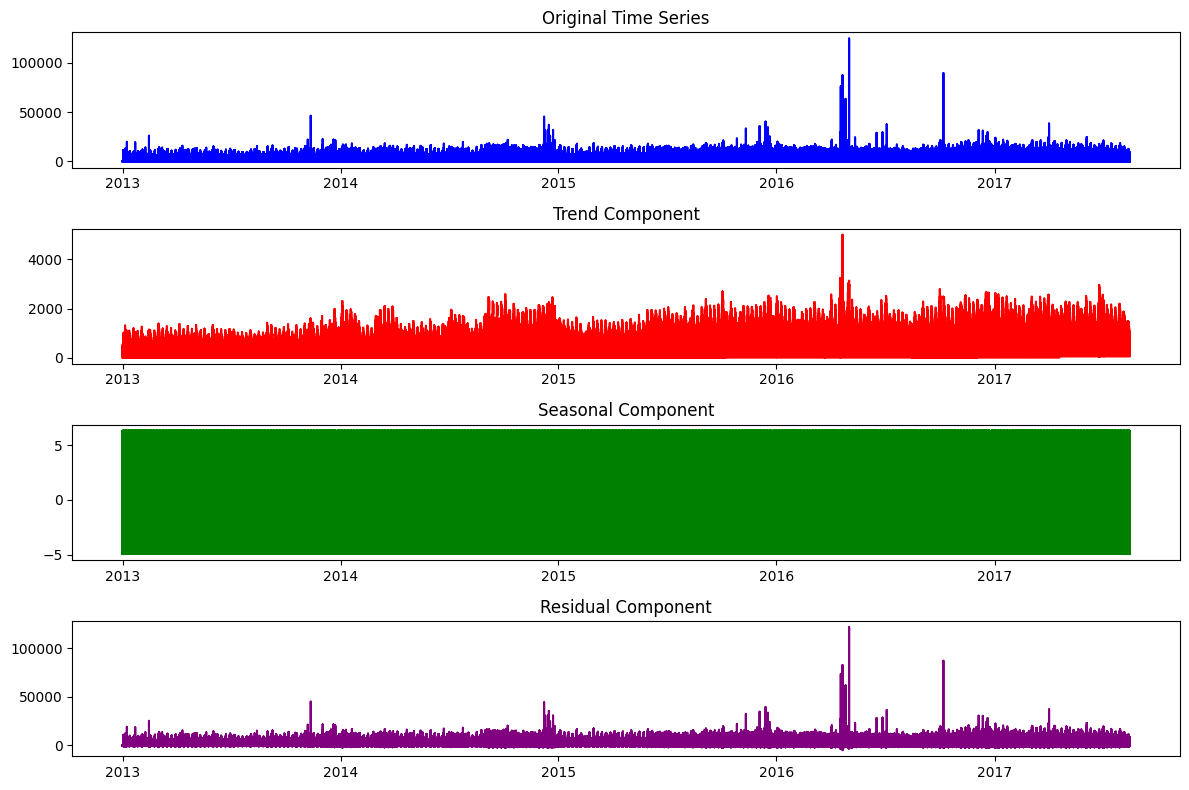

In [111]:
# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(train_mod['sales'], model='additive', period=48)

# Get the components: trend, seasonal, and residual
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(train_mod['sales'], label='Original', color='blue')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residual', color='purple')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

* From the graph, there is trend in the data and no seasonality

In [112]:
# Assuming 'year,' 'month,' and 'day' are columns in the DataFrame
train_mod['Date'] = pd.to_datetime(train_mod[['year', 'month', 'day']])

In [113]:
train_mod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054564 entries, 2013-01-01 to 2017-08-15
Data columns (total 21 columns):
 #   Column            Dtype         
---  ------            -----         
 0   store_nbr         int64         
 1   Product           object        
 2   sales             float64       
 3   onpromotion       int32         
 4   oil price         float64       
 5   holiday_type      object        
 6   locale            object        
 7   locale_name       object        
 8   description       object        
 9   transferred       bool          
 10  city              object        
 11  state             object        
 12  store_type        object        
 13  cluster           int64         
 14  year              int32         
 15  year-month        object        
 16  month             int32         
 17  day               int32         
 18  Store Type        object        
 19  Product_Category  object        
 20  Date              datetime64[ns

In [114]:
# Define a function that is responsible for ploting the time series component individually
def decompose(df, column_name):
    """
    Decompose a time series into trend, seasonality, and residual components using both multiplicative and additive models.

    Parameters:
        df (DataFrame): The input DataFrame containing time series data.
        column_name (str): The column name for which trend, seasonality, and residual are to be captured.

    Returns:
        result_mul (seasonal_decompose): Result of the multiplicative decomposition.
        result_add (seasonal_decompose): Result of the additive decomposition.
    """
    # Perform multiplicative decomposition
    result_mul = seasonal_decompose(df.groupby(df['Date'])[column_name].sum(), model='multiplicative', extrapolate_trend='freq', period=12)
    
    # Perform additive decomposition
    result_add = seasonal_decompose(df.groupby(df['Date'])[column_name].sum(), model='additive', extrapolate_trend='freq', period=12)

    # Set plot size and create subplots
    plt.rcParams.update({'figure.figsize': (18, 10)})
    fig, ax = plt.subplots(4, 2)  # 4 rows, 2 columns for two sets of plots

    # Plot multiplicative decomposition
    result_mul.observed.plot(ax=ax[0, 0])
    result_mul.trend.plot(ax=ax[1, 0])
    result_mul.seasonal.plot(ax=ax[2, 0])
    ax[3, 0].scatter(result_mul.resid.index, result_mul.resid, s=20, marker='o', alpha=0.5)  # Scatter plot for residuals

    # Plot additive decomposition
    result_add.observed.plot(ax=ax[0, 1])
    result_add.trend.plot(ax=ax[1, 1])
    result_add.seasonal.plot(ax=ax[2, 1])
    ax[3, 1].scatter(result_add.resid.index, result_add.resid, s=20, marker='o', alpha=0.5)  # Scatter plot for residuals

    # Set suptitles
    ax[0, 0].set_title('Multiplicative Decompose - Observed')
    ax[0, 1].set_title('Additive Decompose - Observed')
    
    ax[1, 0].set_title('Multiplicative Decompose - Trend')
    ax[1, 1].set_title('Additive Decompose - Trend')
    
    ax[2, 0].set_title('Multiplicative Decompose - Seasonal')
    ax[2, 1].set_title('Additive Decompose - Seasonal')
    
    ax[3, 0].set_title('Multiplicative Decompose - Residual')
    ax[3, 1].set_title('Additive Decompose - Residual')

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Show the plots
    plt.show()

    return result_mul, result_add



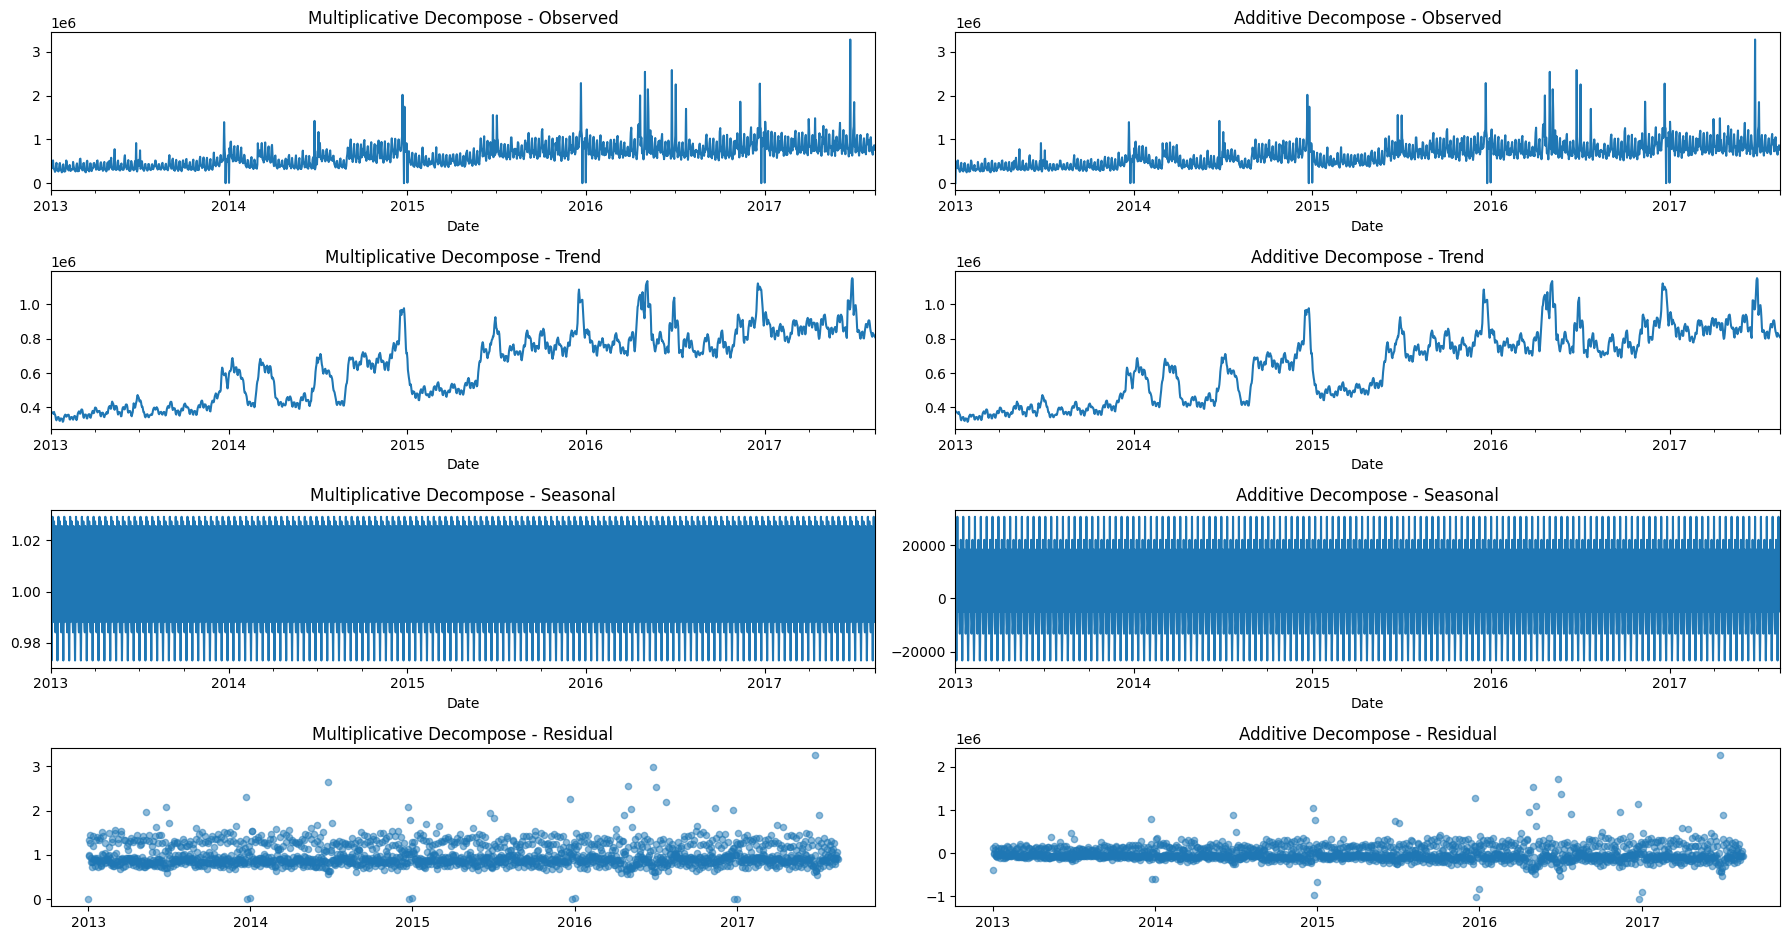

In [115]:
# Generate the various plot by calling the decompose function
result_mul, result_add = decompose(train_mod, 'sales')

### Stationarity Test 

##### KPSS (Kwiatkowski-Phillips-Schmidt-Shin)
THis is a statistical test used to determine the stationarity of a time series dataset. Stationarity is a key concept in time series analysis. A stationary time series is one whose statistical properties, such as mean, variance, and autocorrelation, do not change over time. Many time series models, including autoregressive integrated moving average (ARIMA) models, assume that the data is stationary.

The KPSS test is particularly useful for detecting a specific type of non-stationarity, known as trend stationarity.

In [116]:
# Perform Stationarity Test

stats,p,lags,critical_values = kpss(train_mod['sales'],'ct')

In [117]:
print(f"Stats: {stats}\n")
print(f"P-Value: {p}\n")
print(f"Lags: {lags}\n")
print(f"Critical Values: {critical_values}\n")

# Check if the data is stationary
if p_value < 0.05:
    print('The data is not stationary')
else:
    print('The data is stationary.')


Stats: 20.62705675130645

P-Value: 0.01

Lags: 744

Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}

The data is not stationary


#### Variance Ratio Test:

The Variance Ratio Test assesses whether the variance of the data changes significantly over time, which can be an indication of non-stationarity. In this test, you compare the variances of different subseries of the data.

In [118]:

# Assuming 'train_data' is your DataFrame and 'sales' is the column of interest
sales_data = train_mod['sales']

# Perform Variance Ratio Test
vr_result = het_arch(sales_data)

# Extract Variance Ratio Test results
test_statistic, p_value, _, _ = vr_result

# Print results
print(f'Variance Ratio Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

# Check if the data is stationary
if p_value < 0.05:
    print('The data is not stationary (reject the null hypothesis of constant variance).')
else:
    print('The data is stationary (fail to reject the null hypothesis of constant variance).')


Variance Ratio Test Statistic: 71104.9087272434
p-value: 0.0
The data is not stationary (reject the null hypothesis of constant variance).


### Differencing 
Differencing is a common technique used in time series analysis to transform a non-stationary time series into a stationary one. A stationary time series is one whose statistical properties, such as mean, variance, and autocorrelation, do not change over time. Stationary time series are easier to model, and many statistical methods and forecasting techniques assume stationarity

In [119]:
# Assuming 'train_data' is your DataFrame
sales_data = train_mod['sales']

# Apply a logarithmic transformation (natural logarithm)
log_sales_data = np.log1p(sales_data)  # Using np.log1p to handle zero values safely

# Replace the 'sales' column with the transformed data in the DataFrame
train_mod['sales'] = log_sales_data

# Perform first-order differencing
first_order_diff = train_mod['sales'].diff(periods=1).dropna()

# Perform KPSS test on the differenced data
kpss_result = sm.tsa.kpss(first_order_diff)

# Extract KPSS test results for differenced data
kpss_statistic, p_value, lags, critical_values = kpss_result

# Print results
print(f'KPSS Statistic (Differenced Data): {kpss_statistic}')
print(f'p-value (Differenced Data): {p_value}')
print(f'Number of Lags Used (Differenced Data): {lags}')
print(f'Critical Values (Differenced Data): {critical_values}')

# Check if the differenced data is stationary
if p_value > 0.05:
    print('The differenced data is stationary (fail to reject the null hypothesis). You can proceed with modeling.')
else:
    print('The differenced data is not stationary (reject the null hypothesis). Further differencing or other transformations may be needed.')


KPSS Statistic (Differenced Data): 0.0003031290621510887
p-value (Differenced Data): 0.1
Number of Lags Used (Differenced Data): 970
Critical Values (Differenced Data): {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The differenced data is stationary (fail to reject the null hypothesis). You can proceed with modeling.


In [120]:
train_mod.head()

,store_nbr,Product,sales,onpromotion,oil price,holiday_type,locale,locale_name,description,transferred,...,state,store_type,cluster,year,year-month,month,day,Store Type,Product_Category,Date
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,...,Pichincha,D,13,2013,2013-01,1,1,D,Grocery and Household Essentials,2013-01-01
2013-01-01,1,BABY CARE,0.0,0,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,...,Pichincha,D,13,2013,2013-01,1,1,D,Grocery and Household Essentials,2013-01-01
2013-01-01,1,BEAUTY,0.0,0,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,...,Pichincha,D,13,2013,2013-01,1,1,D,Grocery and Household Essentials,2013-01-01
2013-01-01,1,BEVERAGES,0.0,0,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,...,Pichincha,D,13,2013,2013-01,1,1,D,Grocery and Household Essentials,2013-01-01
2013-01-01,1,BOOKS,0.0,0,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,...,Pichincha,D,13,2013,2013-01,1,1,D,Entertainment and Leisure,2013-01-01


##### Checking for total sales per month in dataset 

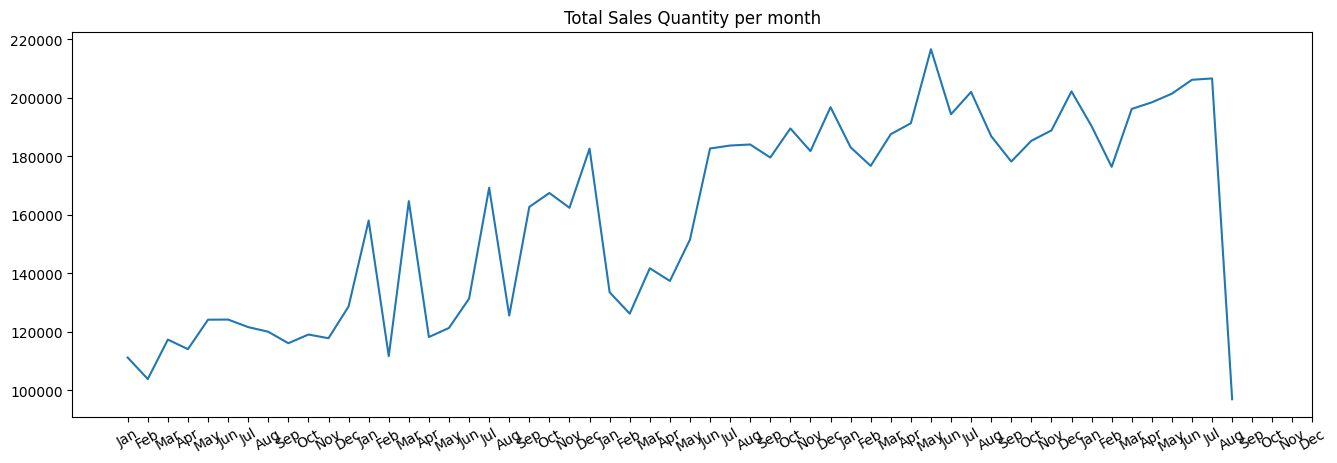

In [121]:
pd.crosstab(columns=train_mod['month'],
            index=train_mod['year'],
            values=train_mod['sales'],
            aggfunc='sum')

SalesQuantitiy=pd.crosstab(columns=train_mod['year'],
            index=train_mod['month'],
            values=train_mod['sales'],
            aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*5

# Plotting the sales
%matplotlib inline
SalesQuantitiy.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,60,1),MonthNames, rotation=30)

* Monthly sales have an upward trend even though there are flactuations on the sales

#### Seasonal Decomposition per monthly sales

In [122]:
# Remove missing values from the time series data
SalesQuantitiy = SalesQuantitiy.dropna()

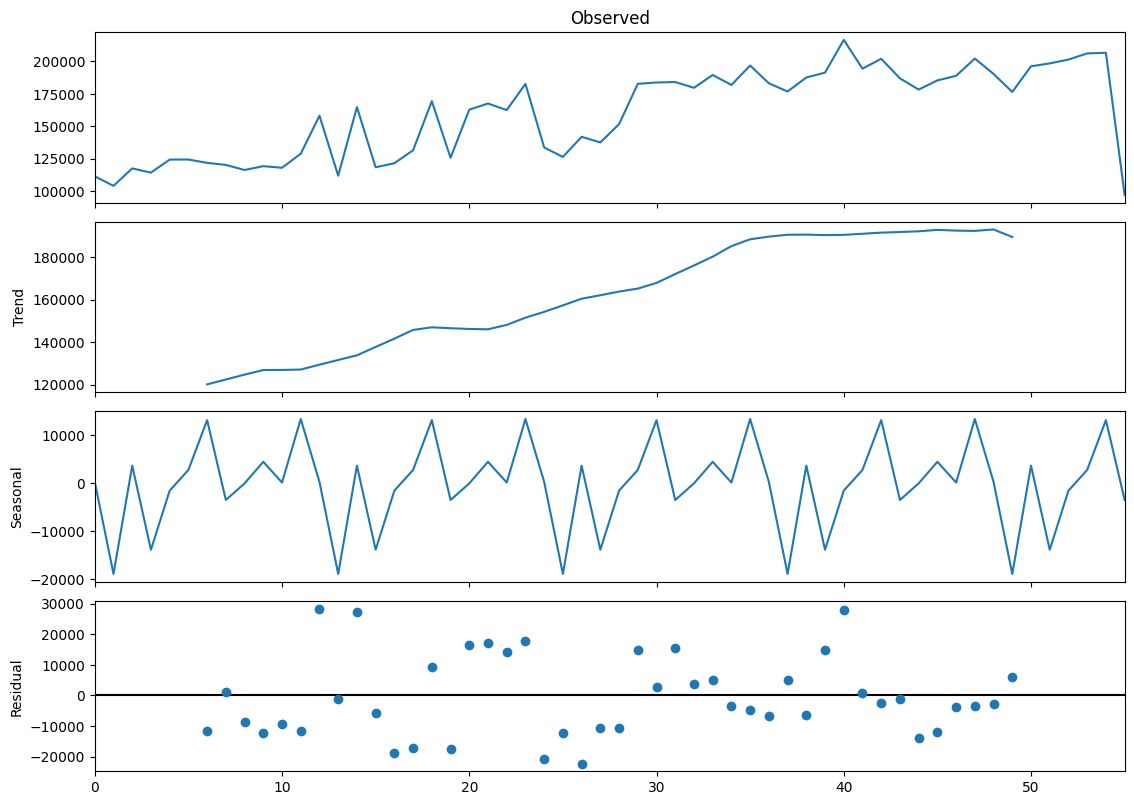

In [123]:

series = SalesQuantitiy.values
result = seasonal_decompose(series, model='additive', period=12)

result.plot()
CurrentFig=plt.gcf()
CurrentFig.set_size_inches(11,8)
plt.show()

## Univariate Time Series Analysis with ARIMA

In [124]:
results_list = []
# Create an empty list to store results

# Assuming you have a DataFrame 'sales_train' for training and 'sales_eval' for evaluation
arima_model = ARIMA(SalesQuantitiy, order=(3, 1, 4))  # Customize (p, d, q)
arima_results = arima_model.fit()
arima_forecast = arima_results.predict(start=0, end=(len(SalesQuantitiy)) + 1, typ = 'levels').rename('Forecast')

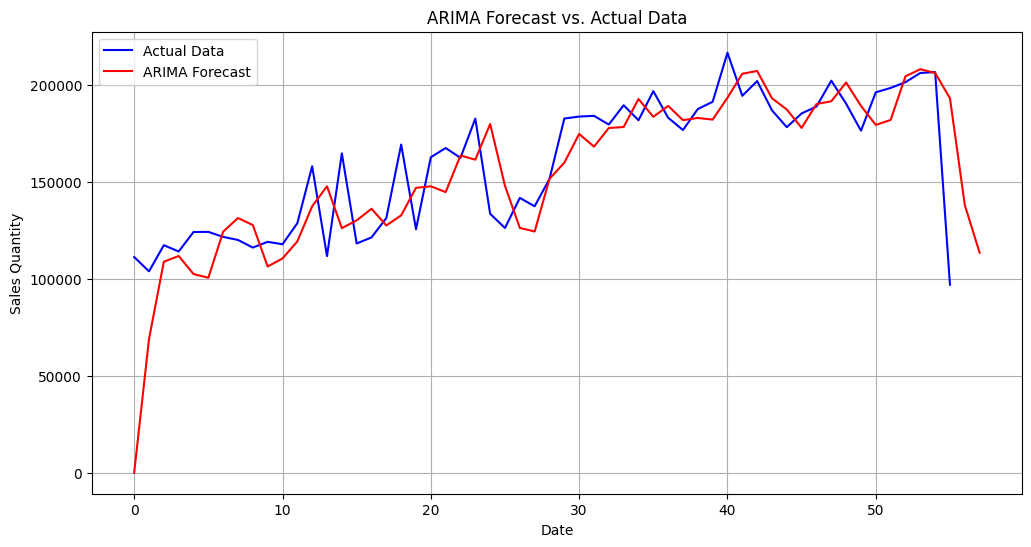

In [125]:
# Plot the actual data and the ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(SalesQuantitiy, label='Actual Data', color='blue')
plt.plot(arima_forecast, label='ARIMA Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('ARIMA Forecast vs. Actual Data')
plt.legend()
plt.grid(True)
plt.show()

In [126]:
# Assuming you have the ARIMA forecast and actual data as described
actual_data = SalesQuantitiy
arima_forecast = arima_results.predict(start=2, end=(len(SalesQuantitiy)) + 1, typ='levels').rename('Forecast')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_data, arima_forecast))

# Calculate RMSLE (Log transform data and forecast before calculating RMSLE)
rmsle = np.sqrt(mean_squared_log_error(np.log1p(actual_data), np.log1p(arima_forecast)))

print(f'RMSE: {rmse}')
print(f'RMSLE: {rmsle}')

RMSE: 16443.335517127744
RMSLE: 0.008297539191260682


### Data Resampling
We use 30% of the data for the rest of the project(autocorrelation test and Modeling) as the dataset is too huge

In [127]:
# Calculate the number of rows to keep (30% of the original DataFrame)
percentage_to_keep = 0.3
num_rows_to_keep = int(len(train_mod) * percentage_to_keep)

# Sample 30% of the DataFrame
train_sample = train_mod.sample(n=num_rows_to_keep, random_state=42)


### TEST FOR AUTOCORRELATION
Autocorrelation refers to the correlation between a time series and its lagged values. It's a crucial concept in time series analysis because it helps us understand the patterns and dependencies within the data. There are two main tools used to test for autocorrelation: the Autocorrelation Function (ACF) and the Partial Autocorrelation Function (PACF)

1. Autocorrelation Function (ACF): The ACF measures the correlation between a time series and its lagged values at various time lags. Each point on the ACF plot represents how correlated the time series is with itself at different points in time. 

* Interpretation:
ACF values range from -1 to 1. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.
Positive autocorrelation at lag k indicates that high values in the time series are followed by high values k time units later, and vice versa for negative autocorrelation.

* Use in Interpretation:
If ACF shows significant correlations at specific lags, it suggests that the time series might have a pattern repeating at those intervals.



2. Partial Autocorrelation Function (PACF): The PACF measures the direct relationship between a time series and its lagged values while removing the influence of shorter lags. In other words, it shows the correlation between the current observation and its lag, holding all other lags constant

* Interpretation:
PACF values are interpreted similarly to ACF, but the difference is that PACF removes the correlation explained by earlier lags. It helps identify the relationship between the current observation and its specific lagged value.

* Use in Interpretation:
Significant spikes in PACF indicate direct relationships between the time series and specific lags. These spikes can help identify the order of autoregressive (AR) terms in an ARIMA model.

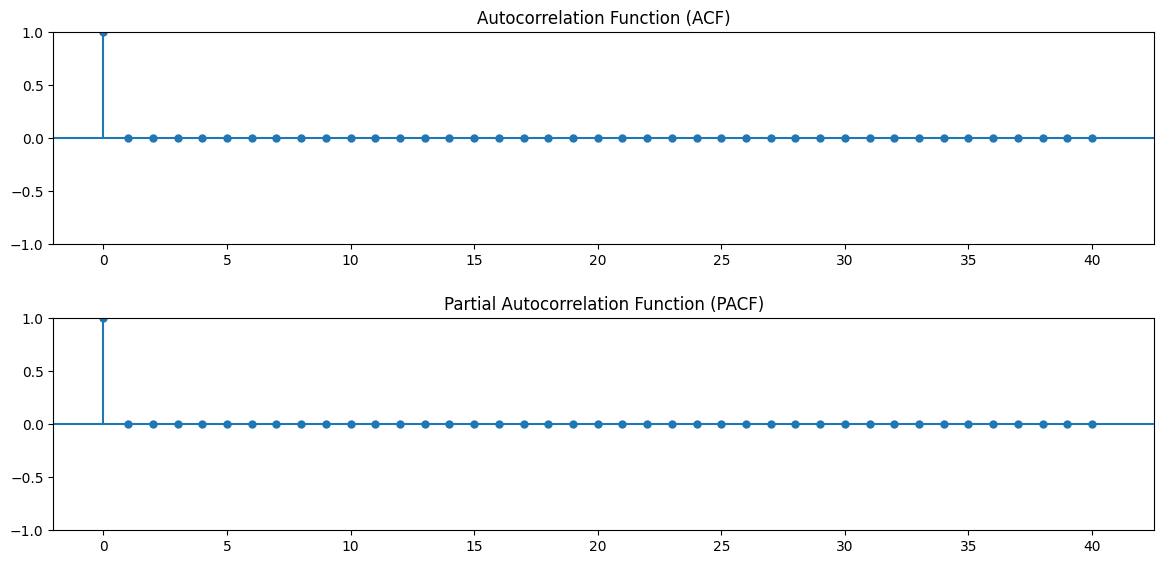

In [128]:
# Assuming 'Dated' is set as the index
ts = train_sample['sales']

# Create subplots with 2 rows and 1 column, specifying figsize
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Plot the Autocorrelation Function (ACF) on the first subplot (ax1)
sm.graphics.tsa.plot_acf(ts, lags=40, ax=ax1)
ax1.set_title("Autocorrelation Function (ACF)")  # Add a title to the first subplot

# Plot the Partial Autocorrelation Function (PACF) on the second subplot (ax2)
sm.graphics.tsa.plot_pacf(ts, lags=40, ax=ax2)
ax2.set_title("Partial Autocorrelation Function (PACF)")  # Add a title to the second subplot

# Add padding between the two subplots for better visualization
plt.tight_layout(pad=2.0)

# Display the plots
plt.show()


## Prepare dataset for Modeling

In [129]:
train_sample.head()

,store_nbr,Product,sales,onpromotion,oil price,holiday_type,locale,locale_name,description,transferred,...,state,store_type,cluster,year,year-month,month,day,Store Type,Product_Category,Date
date,,,,,,,,,,,,,,,,,,,,,
2013-08-19,42,BOOKS,0.000000,0,107.139999,Work Day,Local,Riobamba,Fundacion de Riobamba,False,...,Azuay,D,2,2013,2013-08,8,19,D,Entertainment and Leisure,2013-08-19
2017-02-08,37,PERSONAL CARE,5.749393,10,52.369999,Work Day,National,Ecuador,Traslado Primer dia del ano,False,...,Azuay,D,2,2017,2017-02,2,8,D,Grocery and Household Essentials,2017-02-08
2016-10-11,24,SCHOOL AND OFFICE SUPPLIES,0.000000,0,50.720001,Work Day,National,Ecuador,Independencia de Guayaquil,False,...,Guayas,D,1,2016,2016-10,10,11,D,Grocery and Household Essentials,2016-10-11
2014-01-02,47,MAGAZINES,0.000000,0,95.139999,Work Day,National,Ecuador,Primer dia del ano,False,...,Pichincha,A,14,2014,2014-01,1,2,A,Entertainment and Leisure,2014-01-02
2017-04-15,12,FROZEN FOODS,3.737670,11,52.896125,Weekend,National,Ecuador,Viernes Santo,False,...,Cotopaxi,C,15,2017,2017-04,4,15,C,Food and Beverages,2017-04-15


In [130]:
# Columns to drop
columns_to_drop = [ 'city', 'state', 'Store Type', 'oil price', 'holiday_type', 'locale', 'locale_name', 'transferred','Product_Category']

# Drop the columns
train_sample = train_sample.drop(columns=columns_to_drop)

In [131]:
# Rearrange columns to make 'sales' the last column
cols = [col for col in train_sample.columns if col != 'sales'] + ['sales']
train_sample = train_sample[cols]

In [132]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 916369 entries, 2013-08-19 to 2014-04-24
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   store_nbr    916369 non-null  int64         
 1   Product      916369 non-null  object        
 2   onpromotion  916369 non-null  int32         
 3   description  916369 non-null  object        
 4   store_type   916369 non-null  object        
 5   cluster      916369 non-null  int64         
 6   year         916369 non-null  int32         
 7   year-month   916369 non-null  object        
 8   month        916369 non-null  int32         
 9   day          916369 non-null  int32         
 10  Date         916369 non-null  datetime64[ns]
 11  sales        916369 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(4), int64(2), object(4)
memory usage: 76.9+ MB


In [133]:
# Aggregating data
train_sam_agg = train_sample.groupby(['Date', 'store_nbr', 'Product', 'cluster' ]).agg({ 'sales': 'sum' }).reset_index()

In [134]:
train_sam_agg.isna().sum()

Date         0
store_nbr    0
Product      0
cluster      0
sales        0
dtype: int64

##  Feature Engineering 

Generate additional features that might help improve your model's performance, such as lag features (previous sales values), rolling statistics, or calendar features.

In [135]:
# Add lag features
num_lags = 2  # You can adjust the number of lags based on your domain knowledge
for i in range(1, num_lags + 1):
    train_sam_agg[f'sales_lag_{i}'] = train_sam_agg['sales'].shift(i)
    
# Add rolling statistics (e.g., rolling mean and rolling standard deviation)
window = 7  # Adjust the rolling window size as needed
train_sam_agg['rolling_mean'] = train_sam_agg['sales'].rolling(window=window).mean()
train_sam_agg['rolling_std'] = train_sam_agg['sales'].rolling(window=window).std()

# Create day of the week feature
train_sam_agg['day_of_week'] = train_sam_agg['Date'].dt.dayofweek


# Drop rows with NaN values created by lag and rolling calculations
train_sam_agg.dropna(inplace=True)




In [136]:
train_sam_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910816 entries, 6 to 910821
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          910816 non-null  datetime64[ns]
 1   store_nbr     910816 non-null  int64         
 2   Product       910816 non-null  object        
 3   cluster       910816 non-null  int64         
 4   sales         910816 non-null  float64       
 5   sales_lag_1   910816 non-null  float64       
 6   sales_lag_2   910816 non-null  float64       
 7   rolling_mean  910816 non-null  float64       
 8   rolling_std   910816 non-null  float64       
 9   day_of_week   910816 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object(1)
memory usage: 73.0+ MB


In [137]:
train_sam_agg.head()

,Date,store_nbr,Product,cluster,sales,sales_lag_1,sales_lag_2,rolling_mean,rolling_std,day_of_week
6,2013-01-01,1,MEATS,13,0.0,0.0,0.0,0.0,0.0,1
7,2013-01-01,1,PET SUPPLIES,13,0.0,0.0,0.0,0.0,0.0,1
8,2013-01-01,1,PLAYERS AND ELECTRONICS,13,0.0,0.0,0.0,0.0,0.0,1
9,2013-01-01,1,PREPARED FOODS,13,0.0,0.0,0.0,0.0,0.0,1
10,2013-01-01,1,PRODUCE,13,0.0,0.0,0.0,0.0,0.0,1


### FEATURE ENCODING AND SCALING 

In [138]:
# Define the columns for numerical and categorical features
numeric_features = ['store_nbr', 'cluster', 'sales', 'day_of_week', 'sales_lag_1', 'sales_lag_2', 'rolling_mean', 'rolling_std'
                    ]
categorical_features = ['Product']


def encode_features(train_sam_agg, numeric_features, categorical_features):
    # Preserve the 'Date' column
    date_column = train_sam_agg['Date']
    
    # Encode categorical features using OneHotEncoder
    encoder = OneHotEncoder(sparse=False, drop='first')
    encoded_categorical = encoder.fit_transform(train_sam_agg[categorical_features])
    encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))
    
    # Scale numerical features using MinMaxScaler
    scaler = MinMaxScaler()
    scaled_numeric = scaler.fit_transform(train_sam_agg[numeric_features])
    scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_features)
    
    # Concatenate encoded categorical, scaled numerical features, and the 'Date' column
    train_enc_agg= pd.concat([date_column, encoded_categorical_df, scaled_numeric_df], axis=1)
    
    return train_enc_agg

In [139]:
# Assuming you have 'data', 'numeric_features', and 'categorical_features' defined somewhere before calling the function
train_enc_agg = encode_features(train_sam_agg, numeric_features, categorical_features)

# Print the encoded dataset
train_enc_agg.head()


,Date,Product_BABY CARE,Product_BEAUTY,Product_BEVERAGES,Product_BOOKS,Product_BREAD/BAKERY,Product_CELEBRATION,Product_CLEANING,Product_DAIRY,Product_DELI,...,Product_SCHOOL AND OFFICE SUPPLIES,Product_SEAFOOD,store_nbr,cluster,sales,day_of_week,sales_lag_1,sales_lag_2,rolling_mean,rolling_std
6,2013-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.018868,0.75,0.0,0.166667,0.0,0.0,0.0,0.0
7,2013-01-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.018868,0.75,0.0,0.166667,0.0,0.0,0.0,0.0
8,2013-01-01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.018868,0.75,0.0,0.166667,0.0,0.0,0.0,0.0
9,2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.018868,0.75,0.0,0.166667,0.0,0.0,0.0,0.0
10,2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.018868,0.75,0.0,0.166667,0.0,0.0,0.0,0.0


In [140]:
train_enc_agg.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 910822 entries, 6 to 5
Data columns (total 41 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Date                                910816 non-null  datetime64[ns]
 1   Product_BABY CARE                   910816 non-null  float64       
 2   Product_BEAUTY                      910816 non-null  float64       
 3   Product_BEVERAGES                   910816 non-null  float64       
 4   Product_BOOKS                       910816 non-null  float64       
 5   Product_BREAD/BAKERY                910816 non-null  float64       
 6   Product_CELEBRATION                 910816 non-null  float64       
 7   Product_CLEANING                    910816 non-null  float64       
 8   Product_DAIRY                       910816 non-null  float64       
 9   Product_DELI                        910816 non-null  float64       
 10  Product_EGGS      

In [141]:
# Sort 
train_enc_agg = train_enc_agg.sort_values('Date')

## Train-Test Split

Split your data into training and testing sets. Typically, you'll use a significant portion of the data for training and the rest for testing/validation.

In [142]:
train_size = int(0.8 * len(train_enc_agg))
train = train_enc_agg[:train_size]
val = train_enc_agg[train_size:]

In [143]:
# Get the train and the validation shapes
train.shape, val.shape

((728657, 41), (182165, 41))

In [144]:
# Training set
X_train = train.drop(columns=['sales', 'Date'])
y_train = train['sales']

In [145]:
# Validation set
X_val = val.drop(columns=['sales', 'Date'])
y_val = val['sales']

## Model Selection

1. Autoregressive Integrated Moving Average (ARIMA) Model

ARIMA is a popular time series forecasting model that combines autoregressive (AR) and moving average (MA) components with differencing for non-stationary data. Here's what each component means:

Autoregressive (AR): This component captures the relationship between an observation and several lagged observations (i.e., the time series values at previous time steps).
Moving Average (MA): This component models the relationship between an observation and a residual error from a moving average model applied to lagged observations.
Integrated (I): This component represents the differencing operation used to make the time series stationary. Differencing subtracts the previous value from the current value to remove trends and seasonality.

2. Linear Regression Model

Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features). The model assumes a linear relationship between the variables, represented by a straight line in a graph.

3. Decision Tree Regression Model

Decision tree regression involves constructing a tree-like structure where each internal node represents a feature (attribute), each branch represents a decision rule, and each leaf node represents the output (prediction). Decision trees split the data based on features to minimize the variance within each split, allowing for complex non-linear relationships to be captured.

Advantages: Easy to understand and interpret, handles non-linear relationships well, requires little data preprocessing.

Disadvantages: Prone to overfitting, sensitive to small variations in the data.

4. XGBOOST REGRESSOR MODEL

XGBoost (Extreme Gradient Boosting) is an advanced and highly efficient implementation of gradient boosting machines. It's used for both regression and classification tasks. XGBoost builds multiple decision trees sequentially, where each tree corrects the errors of the previous one. It combines the predictions from multiple weak learners to create a strong learner.

Advantages: High accuracy, handles missing values well, robust to overfitting, supports parallel processing.

Disadvantages: Requires tuning of hyperparameters, may be computationally intensive for large datasets.

### MULTIVARIATE ANALYSIS

In [146]:
# Define a custom color palette
custom_color_palette = ["#FF5733","#3498db","#2ecc71","#e67e22"]

# Define a function to plot the predictions aganist the actuals
def plot_predictions(date, y_val, y_pred, forecast_label, title):
    """
    Plot the actual and predicted time series data.

    Parameters:
    date (array-like): Date or time index.
    y_test (array-like): Actual values.
    y_pred (array-like): Predicted values.
    forecast_label (str): Label for the forecasted data.
    title (str): Title for the plot.
    """
    # Set the custom color palette
    sns.set_palette(custom_color_palette)
    
    # Create a figure with specified dimensions
    plt.figure(figsize=(10, 6))

    # Plot the actual data in green
    sns.lineplot(x=date, y=y_val, label='Actual', color=custom_color_palette[0])

    # Plot the predicted data in blue with the specified label
    sns.lineplot(x=date, y=y_pred, label=forecast_label, color=custom_color_palette[2])

    # Add a legend to the plot
    plt.legend()

    # Set the title of the plot
    plt.title(title)

    # Display the plot
    plt.show()

In [147]:
# Define a function to compute the evaluations metrics after the forecast
def evaluate_forecast(y_val, forecast):
    """
    Compute MSE, RMSE, and RMSLE for a forecast.

    Parameters:
    y_test (array-like): Actual values.
    forecast (array-like): Predicted values.

    Returns:
    dict: Dictionary containing MSE, RMSE, and RMSLE.
    """
    def rmsle(predicted, actual):
        return np.sqrt(np.mean(np.square(np.log1p(predicted) - np.log1p(actual))))

    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_val, forecast)
    
    # Compute Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    
    # Compute Root Mean Squared Logarithmic Error (RMSLE)
    rmsle_value = rmsle(forecast, y_val)
    
    # Return the evaluation metrics as a dictionary
    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'RMSLE': rmsle_value
    }
    
    return metrics

In [148]:
# Other columns which help predict sales
ex_cols = ['day_of_week', 'sales_lag_1', 'sales_lag_2', 'rolling_mean', 'rolling_std']

## Autoregressive Integrated Moving Average (ARIMA) Model

In [149]:
# Forward fill missing values in the specified exogenous columns
X_val[ex_cols] = X_val[ex_cols].fillna(method='ffill')


In [150]:
y_val=y_val.fillna(method='ffill')

In [151]:
# Define Instance of the Model
model_arima = sm.tsa.ARIMA(y_train, exog=X_train[ex_cols], order=(1,0,0))

# Fit the Model
results_arima = model_arima.fit()


# Make Predictions
forecast_arima = results_arima.predict(start=len(train), end=len(train) + len(val) - 1,  exog=X_val[ex_cols])

# Drop rows with NaN values from the dataset
# X_val_clean = X_val.dropna(subset=ex_cols)


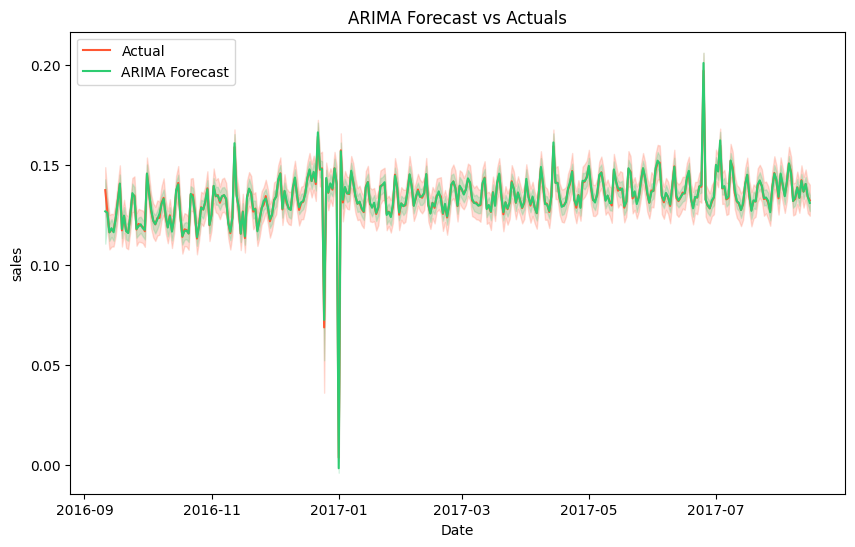

In [152]:
# Apply the function to plot the predictions vs actual
plot_predictions(val['Date'],y_val, forecast_arima, 'ARIMA Forecast', 'ARIMA Forecast vs Actuals')

In [153]:
# Calcualte the metrics
arima_metrics = evaluate_forecast(y_val, forecast_arima)

# Print out
arima_metrics

{'MSE': 0.007701559485982467,
 'RMSE': 0.08775852942012227,
 'RMSLE': 0.09725760519829416}

## Linear Regression Model

In [154]:
# Define Instance of the Model
model_lr = LinearRegression()

# Fit the Model
model_lr.fit(X_train[ex_cols], y_train)

# Make Predictions
forecast_lr = model_lr.predict(X_val[ex_cols])


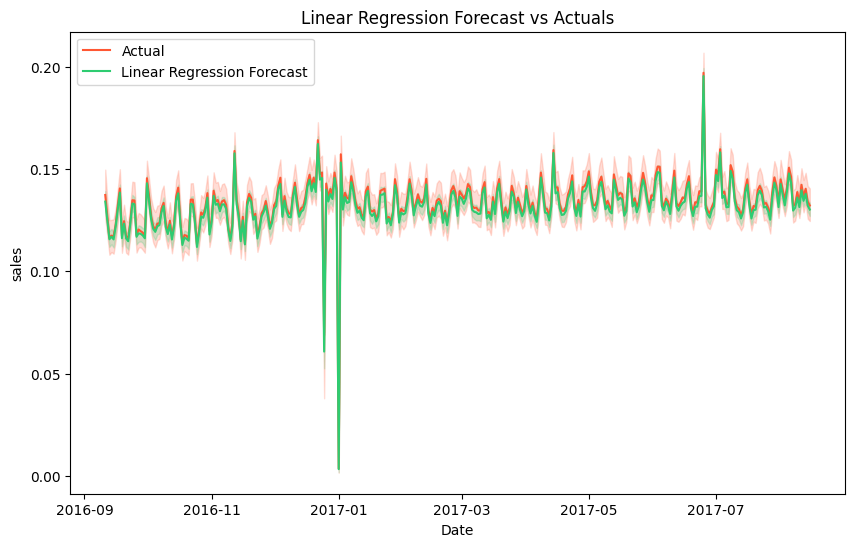

In [155]:
# Apply the function to plot the predictions vs actual
plot_predictions(val['Date'], y_val, forecast_lr, 'Linear Regression Forecast', 'Linear Regression Forecast vs Actuals')


In [156]:
# Calcualte the metrics
lr_metrics = evaluate_forecast(y_val, forecast_lr)

# Print out
lr_metrics

{'MSE': 0.007632074074105493,
 'RMSE': 0.08736174262287523,
 'RMSLE': 0.07638503062887833}

## Decision Tree Regression Model

In [157]:
# Define Instance of the Model
model_decision_tree = DecisionTreeRegressor()

# Fit the Model
model_decision_tree.fit(X_train[ex_cols], y_train)

# Make Predictions
forecast_decision_tree = model_decision_tree.predict(X_val[ex_cols])



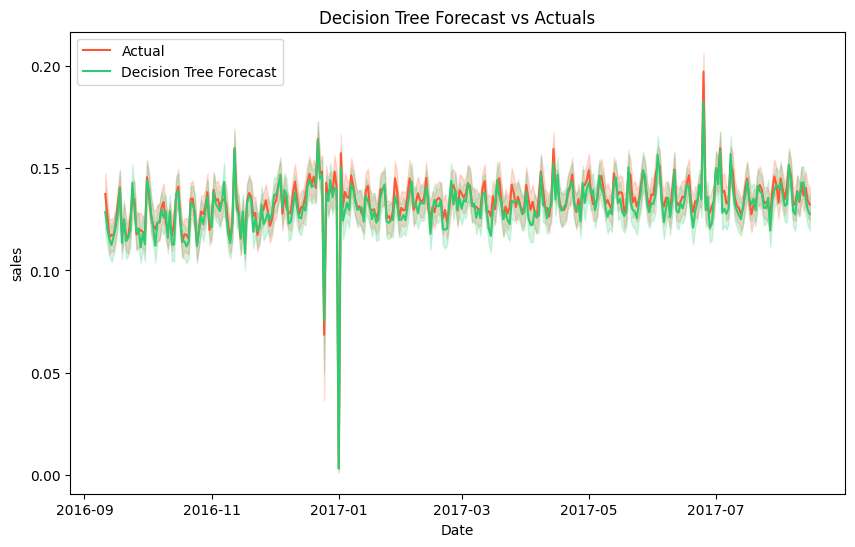

In [158]:
# Plot predictions vs actuals
plot_predictions(val['Date'], y_val, forecast_decision_tree, 'Decision Tree Forecast', 'Decision Tree Forecast vs Actuals')

In [159]:
# Calcualte the metrics
decision_tree_metrics = evaluate_forecast(y_val, forecast_decision_tree )

# Print out
decision_tree_metrics

{'MSE': 0.01462360585615844,
 'RMSE': 0.12092810201172613,
 'RMSLE': 0.10598867457189685}

## XGBOOST REGRESSOR MODEL

In [160]:
# Define and configure the XGBoost model
model_xgboost = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the XGBoost model
model_xgboost.fit(X_train, y_train)

# Make Predictions
forecast_xgboost = model_xgboost.predict(X_val)


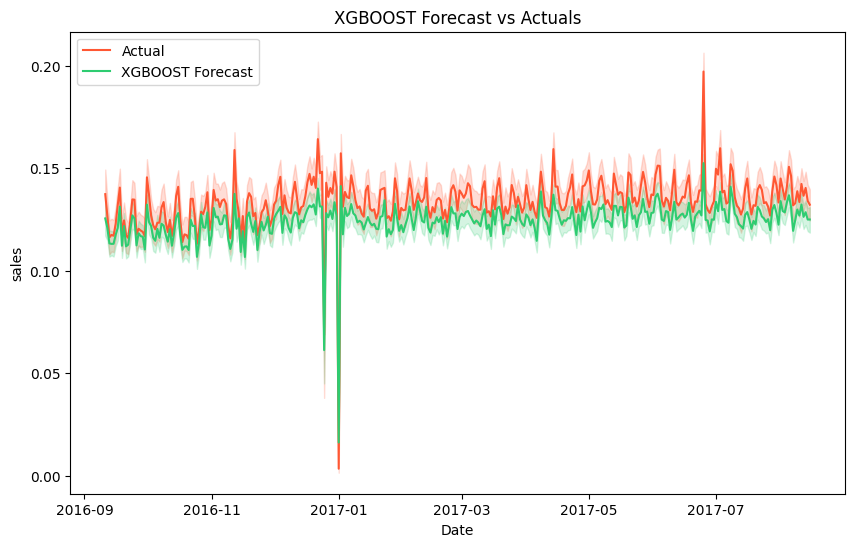

In [161]:
# Plot predictions vs actuals
plot_predictions(val['Date'], y_val, forecast_xgboost, 'XGBOOST Forecast', 'XGBOOST Forecast vs Actuals')

In [162]:
# Calcualte the metrics
xgboost_metrics = evaluate_forecast(y_val, forecast_xgboost )

# Print out
xgboost_metrics 

{'MSE': 0.002271732462981066,
 'RMSE': 0.047662694667644064,
 'RMSLE': 0.041485746063559654}

In [163]:
# Define your metrics as dictionaries
arima_metrics = {'MSE': 0.007701559485982467, 'RMSE': 0.08775852942012227, 'RMSLE': 0.09725760519829416}
linear_regression_metrics = {'MSE': 0.007632074074105493, 'RMSE': 0.08736174262287523, 'RMSLE': 0.07638503062887833}
decision_tree_metrics = {'MSE': 0.014668009886682813, 'RMSE': 0.1211115596740576, 'RMSLE': 0.10613923148787119}
xgboost_metrics = {'MSE': 0.002271732462981066, 'RMSE': 0.047662694667644064, 'RMSLE': 0.041485746063559654}

# Create a dictionary to store the metrics
metrics_dict = {
    'ARIMA': arima_metrics,
    'Linear Regression': linear_regression_metrics,
    'Decision Tree': decision_tree_metrics,
    'XGBoost': xgboost_metrics
}

# Convert the dictionary to a pandas DataFrame
metrics_df = pd.DataFrame(metrics_dict).T  # .T transposes the DataFrame to have models as rows and metrics as columns

# Sort the DataFrame based on a specific metric (e.g., MSE) in ascending order
sorted_metrics_df = metrics_df.sort_values(by='MSE', ascending=True)

# Print or display the sorted DataFrame
sorted_metrics_df



,MSE,RMSE,RMSLE
XGBoost,0.002272,0.047663,0.041486
Linear Regression,0.007632,0.087362,0.076385
ARIMA,0.007702,0.087759,0.097258
Decision Tree,0.014668,0.121112,0.106139


In [164]:
# Create a bar chart using Plotly Express
fig = px.bar(sorted_metrics_df, 
             y=sorted_metrics_df.index,  # Models as y-axis
             x='RMSLE',  # Metric to be displayed on the x-axis
             orientation='h',  # Horizontal orientation
             title='Model Metrics Comparison',  # Chart title
             labels={'RMSLE': 'Root Mean Squared Logarithmic Error (RMSLE)'},  # Label for the x-axis
             )

# Show the plot
fig.show()

##  Model Validation



#### Cross-Validation using K-Fold 
K-Fold Cross-Validation is a technique used in machine learning to evaluate the performance of a predictive model. It helps in assessing how well a model generalizes to an independent dataset. The process involves dividing the dataset into K subsets (or "folds") of approximately equal size. The model is trained K times, each time using K-1 of the folds as training data and the remaining 1 fold as the test data. This process is repeated K times, with each of the K folds used exactly once as the test data. The K results from the folds can then be averaged to produce a single estimation of model performance.

In [165]:

# Define and configure the XGBoost model
model_xgboost = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)

# Perform 5-fold cross-validation
# cv_scores = cross_val_score(model_xgboost, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = cross_val_score(model_xgboost, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Calculate RMSE scores from negative MSE scores
rmse_scores = np.sqrt(-cv_scores)

# Print RMSE scores for each fold
print("Cross-Validation RMSE Scores: ", rmse_scores)

# Calculate and print the mean RMSE score
print("Mean RMSE: ", np.mean(rmse_scores))


Cross-Validation RMSE Scores:  [0.05021148 0.05134196 0.05016267 0.04960233 0.05282828]
Mean RMSE:  0.05082934230651026


In [166]:


# Define RMSLE as a custom scoring function
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

# Make RMSLE scorer for cross-validation
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Define and configure the XGBoost model
model_xgboost = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)

# Perform 5-fold cross-validation with RMSLE scoring
cv_scores = cross_val_score(model_xgboost, X_train, y_train, cv=5, scoring=rmsle_scorer, n_jobs=-1)

# Convert negative scores to positive (as make_scorer uses negative values)
rmsle_scores = -cv_scores

# Print RMSLE scores for each fold
print("Cross-Validation RMSLE Scores: ", rmsle_scores)

# Calculate and print the mean RMSLE score
print("Mean RMSLE: ", np.mean(rmsle_scores))


Cross-Validation RMSLE Scores:  [0.04602522 0.0463598  0.0449145  0.04396611 0.04551434]
Mean RMSLE:  0.04535599694475527


## Hyperparameter Tuning
Hyperparameter tuning is the process of finding the best settings for a machine learning model's external configurations. These settings, called hyperparameters, significantly influence a model's performance. Techniques like grid search, random search, Bayesian optimization, and genetic algorithms are used to find the optimal hyperparameter values. Proper tuning improves model accuracy, generalization, and resource efficiency.

In [167]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Define and configure the XGBoost model
model_xgboost = xgb.XGBRegressor(objective='reg:squarederror')

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model_xgboost, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by Grid Search
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best model from Grid Search
best_model_xgboost = grid_search.best_estimator_

# Make predictions with the best model
forecast_xgboost_tuned = best_model_xgboost.predict(X_val)

# Calculate and print the metrics for the tuned model
xgboost_tuned_metrics = evaluate_forecast(y_val, forecast_xgboost_tuned)
print("Tuned XGBoost Metrics: ", xgboost_tuned_metrics)


Best Hyperparameters:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Tuned XGBoost Metrics:  {'MSE': 0.001200246890678587, 'RMSE': 0.03464457952809627, 'RMSLE': 0.030581689273184654}


## Predicting on the Test Data

In [168]:
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [169]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [170]:
test_data.shape

(28512, 5)

In [171]:
# Rename the 'family' column
test_data.rename(columns={'family': 'Product'}, inplace=True)

# Rename the 'date' column
test_data.rename(columns={'date': 'Date'}, inplace=True)

In [172]:
# Merge stores_data based on 'store_nbr'
test_m = pd.merge(test_data , stores_data, on='store_nbr', how='left')

In [173]:
test_m.head()

,id,Date,store_nbr,Product,onpromotion,city,state,type,cluster
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13


In [174]:
# transc_data['date'] = pd.to_datetime(transc_data['date'], format='%Y-%m-%d')
test_m['Date'] = pd.to_datetime(test_m['Date'], format='%Y-%m-%d', errors='coerce')

# Reset the index of 'transc_data' so that 'date' becomes a column
test_m.reset_index(inplace=False)

,index,id,Date,store_nbr,Product,onpromotion,city,state,type,cluster
0,0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13
1,1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13
2,2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13
3,3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13
4,4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
28507,28507,3029395,2017-08-31,9,POULTRY,1,Quito,Pichincha,B,6
28508,28508,3029396,2017-08-31,9,PREPARED FOODS,0,Quito,Pichincha,B,6
28509,28509,3029397,2017-08-31,9,PRODUCE,1,Quito,Pichincha,B,6
28510,28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,Quito,Pichincha,B,6


In [175]:
# Convert onpromotion to int
test_m['onpromotion'] = test_m['onpromotion'].astype('int')

In [176]:
test_m_agg = test_m.groupby(['Date', 'store_nbr', 'Product', 'cluster' ]).agg({ 'onpromotion': 'sum' }).reset_index()

In [177]:
test_m_agg.isna().sum()

Date           0
store_nbr      0
Product        0
cluster        0
onpromotion    0
dtype: int64

In [178]:
# Create day of the week feature
test_m_agg['day_of_week'] = test_m_agg['Date'].dt.dayofweek


In [179]:
# The lag cannot be computed here because there is no previous data
test_m_agg['sales_lag_1'] = 0
test_m_agg['sales_lag_2'] = 0
# Same applies to the rolling mean
test_m_agg['rolling_mean'] = 0
test_m_agg['rolling_std'] = 0

In [180]:
test_m_agg.head()

,Date,store_nbr,Product,cluster,onpromotion,day_of_week,sales_lag_1,sales_lag_2,rolling_mean,rolling_std
0,2017-08-16,1,AUTOMOTIVE,13,0,2,0,0,0,0
1,2017-08-16,1,BABY CARE,13,0,2,0,0,0,0
2,2017-08-16,1,BEAUTY,13,2,2,0,0,0,0
3,2017-08-16,1,BEVERAGES,13,20,2,0,0,0,0
4,2017-08-16,1,BOOKS,13,0,2,0,0,0,0


In [181]:
# Assuming you have 'data', 'numeric_features', and 'categorical_features' defined somewhere before calling the function

# Exclude 'sales' column from numeric features
numeric_features = [col for col in numeric_features if col != 'sales']

# Encode categorical features and scale numerical features
test_enc = encode_features(test_m_agg, numeric_features, categorical_features)


In [182]:
test_enc.head()

,Date,Product_BABY CARE,Product_BEAUTY,Product_BEVERAGES,Product_BOOKS,Product_BREAD/BAKERY,Product_CELEBRATION,Product_CLEANING,Product_DAIRY,Product_DELI,...,Product_PRODUCE,Product_SCHOOL AND OFFICE SUPPLIES,Product_SEAFOOD,store_nbr,cluster,day_of_week,sales_lag_1,sales_lag_2,rolling_mean,rolling_std
0,2017-08-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.75,0.333333,0.0,0.0,0.0,0.0
1,2017-08-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.75,0.333333,0.0,0.0,0.0,0.0
2,2017-08-16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.75,0.333333,0.0,0.0,0.0,0.0
3,2017-08-16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.75,0.333333,0.0,0.0,0.0,0.0
4,2017-08-16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.75,0.333333,0.0,0.0,0.0,0.0


In [183]:
# X_train features 
X_train_features = X_train.columns.to_list()

# Values to forecast
test_pred = test_enc[X_train_features]

In [184]:
prediction_t = best_model_xgboost.predict(test_pred)

In [185]:

# Create a DataFrame for test predictions with 'IDColumn' and 'Predicted_Sales' columns
prediction_df = pd.DataFrame({'ID': test_pred.index, 'Predicted_Sales': prediction_t})

# Print or display the prediction DataFrame
prediction_df




,ID,Predicted_Sales
0,0,0.009705
1,1,-0.012628
2,2,0.010077
3,3,0.002420
4,4,-0.011743
...,...,...
28507,28507,0.006842
28508,28508,0.005174
28509,28509,-0.010416
28510,28510,-0.000951


In [186]:
prediction_df.shape

(28512, 2)

In [187]:

# # Using raw string to avoid escape characters in the file path
# prediction_df.to_csv(r'C:\Users\USER\Azubi LP3\predicted_sales_new.csv', index=False)



In [188]:
# add the predicted sales to the other dataset
# Assuming prediction_df and test_m_agg have the same number of rows and are ordered appropriately
new_df = pd.concat([test_m_agg, prediction_df['Predicted_Sales']],axis=1)

# Print or display the concatenated DataFrame
new_df


,Date,store_nbr,Product,cluster,onpromotion,day_of_week,sales_lag_1,sales_lag_2,rolling_mean,rolling_std,Predicted_Sales
0,2017-08-16,1,AUTOMOTIVE,13,0,2,0,0,0,0,0.009705
1,2017-08-16,1,BABY CARE,13,0,2,0,0,0,0,-0.012628
2,2017-08-16,1,BEAUTY,13,2,2,0,0,0,0,0.010077
3,2017-08-16,1,BEVERAGES,13,20,2,0,0,0,0,0.002420
4,2017-08-16,1,BOOKS,13,0,2,0,0,0,0,-0.011743
...,...,...,...,...,...,...,...,...,...,...,...
28507,2017-08-31,54,POULTRY,3,0,3,0,0,0,0,0.006842
28508,2017-08-31,54,PREPARED FOODS,3,0,3,0,0,0,0,0.005174
28509,2017-08-31,54,PRODUCE,3,1,3,0,0,0,0,-0.010416
28510,2017-08-31,54,SCHOOL AND OFFICE SUPPLIES,3,0,3,0,0,0,0,-0.000951
